# <center>Analysis Of Flight Delay Patterns In The US</center>

# <center>By</center>

# <center>Suleman Aneru</center>

## Investigation Overview

This investigation studies the pattern of flight delays experienced in the US from 2003 to 2008 and the various factors that contribute to the delays observed.

The investigation observed this delay patterns for each day of the week and each month of the year to discover a pattern. In addition, the effect of the various airlines as well as the different airports were considered in this investigation

## Dataset Overview

There are more than 37,000,000 flights in the dataset with 29 features. 

Some of the features used in this investigation are listed below:

- Year
- Month
- Day of the Week
- Departure Delays (in minutes)
- Arrival Delays (in minutes)
- Unique Carrier (the airline)
- Departure Airport
- Destination Airport



## Data Wrangling

The original dataset contains data from 1987 till 2008 and has a size of approximately 12gb which was too large for the machine used in this analysis, so focus was shifted to data beginning from the new millenium.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.patches as mpatches

import datetime
from scipy import stats
from IPython.core.display import HTML

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

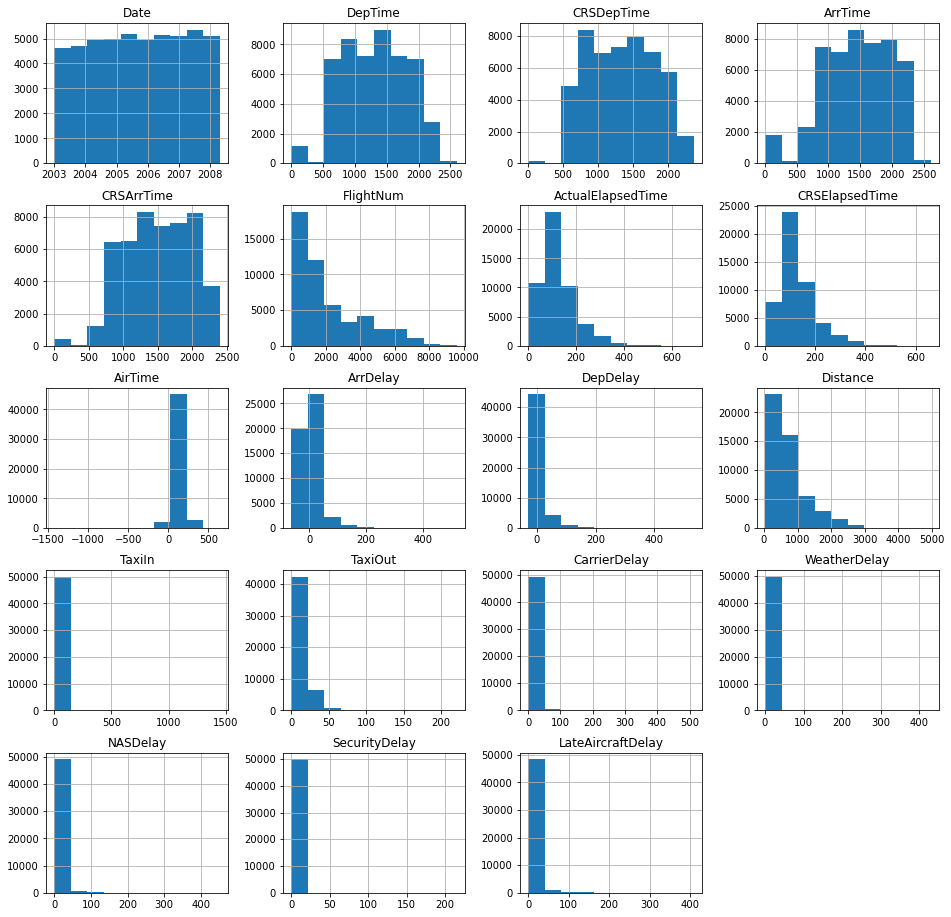

In [49]:
#Plot an histogram of all numerical data
flight_sample.hist(figsize=(16,16));

## Distribution Of Delayed Flights
The flight delays were analysed from both the angle of departure delays and arrival delays.

The distribution showed that many flights departed right on time with this making approximately 17% of the flights investigated while only approximately 7% of the flights investigated arrived exactly on time.

The distribution also showed that there were flights that departed and arrived earlier than schedule but there were more flights that experienced delays.

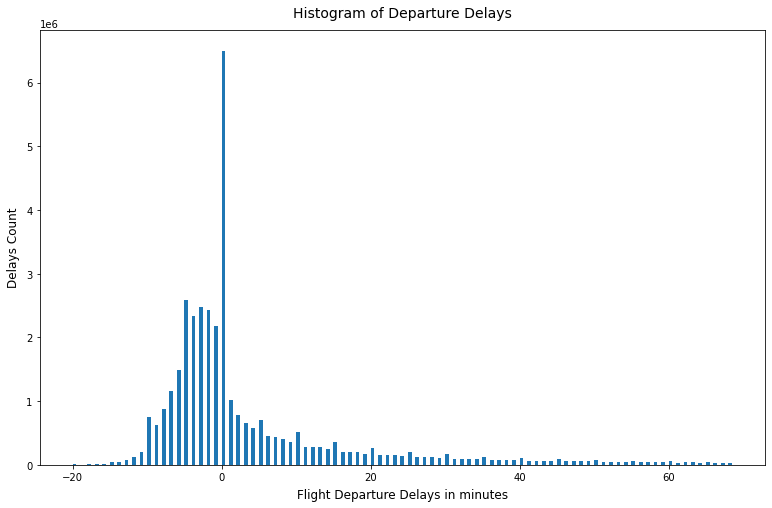

In [38]:
#Plot a histogram to see the data spread for the duration of time departure flights are delayed
plt.figure(figsize=[13, 8])
binsize = 0.5
bins = np.arange(-20, flight_df['DepDelay'].mean()+60, binsize)
plt.hist(data = flight_df, x = 'DepDelay', bins = bins);
plt.title('Histogram of Departure Delays', fontsize=14, y=1.015)
plt.xlabel('Flight Departure Delays in minutes', labelpad=6, fontsize=12)
plt.ylabel('Delays Count', labelpad=6, fontsize=12)
plt.show()

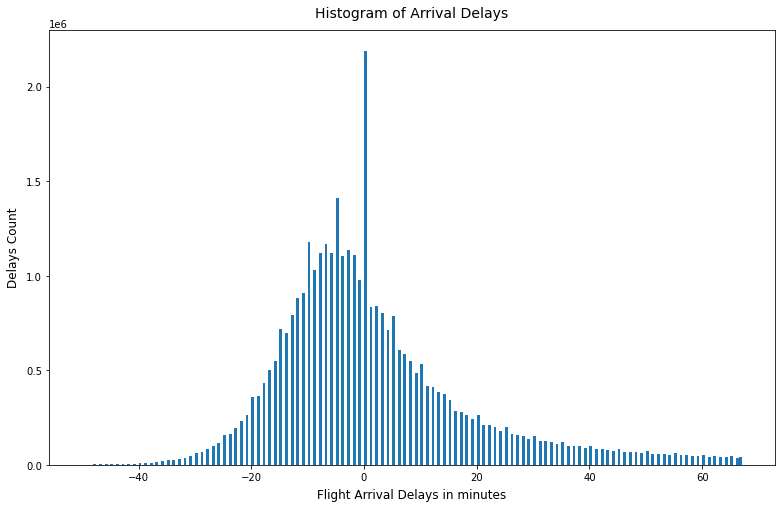

In [39]:
#Plot a histogram to see the data spread for the amount of time arrival flights are delayed
plt.figure(figsize=[13, 8])
binsize = 0.5
bins = np.arange(-50, flight_df['ArrDelay'].mean()+60, binsize)
plt.hist(data = flight_df, x = 'ArrDelay', bins = bins);
plt.title('Histogram of Arrival Delays', fontsize=14, y=1.015)
plt.xlabel('Flight Arrival Delays in minutes', labelpad=6, fontsize=12)
plt.ylabel('Delays Count', labelpad=6, fontsize=12)
plt.show()

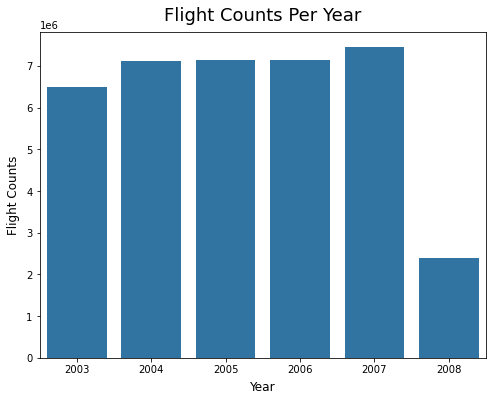

In [266]:
#Perform a count of the flights per year
rcParams['figure.figsize'] = 8,6
sns.countplot(data = flight_df, x = 'Year', color = sns.color_palette()[0]);
plt.title('Flight Counts Per Year', fontsize=18, y=1.015)
plt.xlabel('Year', labelpad=6, fontsize=12)
plt.ylabel('Flight Counts', labelpad=6, fontsize=12);

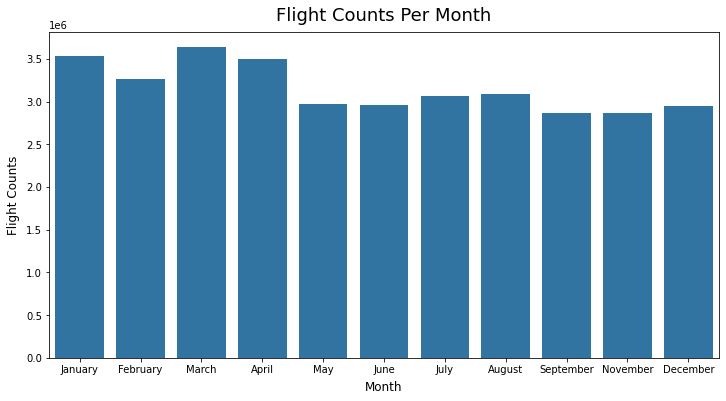

In [268]:
#Perform a count of the flights per month
rcParams['figure.figsize'] = 12,6
sns.countplot(data = flight_df, x = 'Month', color = sns.color_palette()[0]);
plt.title('Flight Counts Per Month', fontsize=18, y=1.015)
plt.xlabel('Month', labelpad=6, fontsize=12)
plt.ylabel('Flight Counts', labelpad=6, fontsize=12);

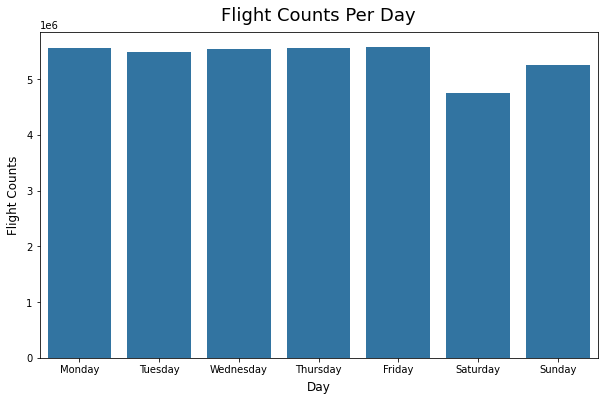

In [269]:
#Perform a count of the flights per day
rcParams['figure.figsize'] = 10,6
sns.countplot(data = flight_df, x = 'DayOfWeek', color = sns.color_palette()[0]);
plt.title('Flight Counts Per Day', fontsize=18, y=1.015)
plt.xlabel('Day', labelpad=6, fontsize=12)
plt.ylabel('Flight Counts', labelpad=6, fontsize=12);

## Bivariate Exploration

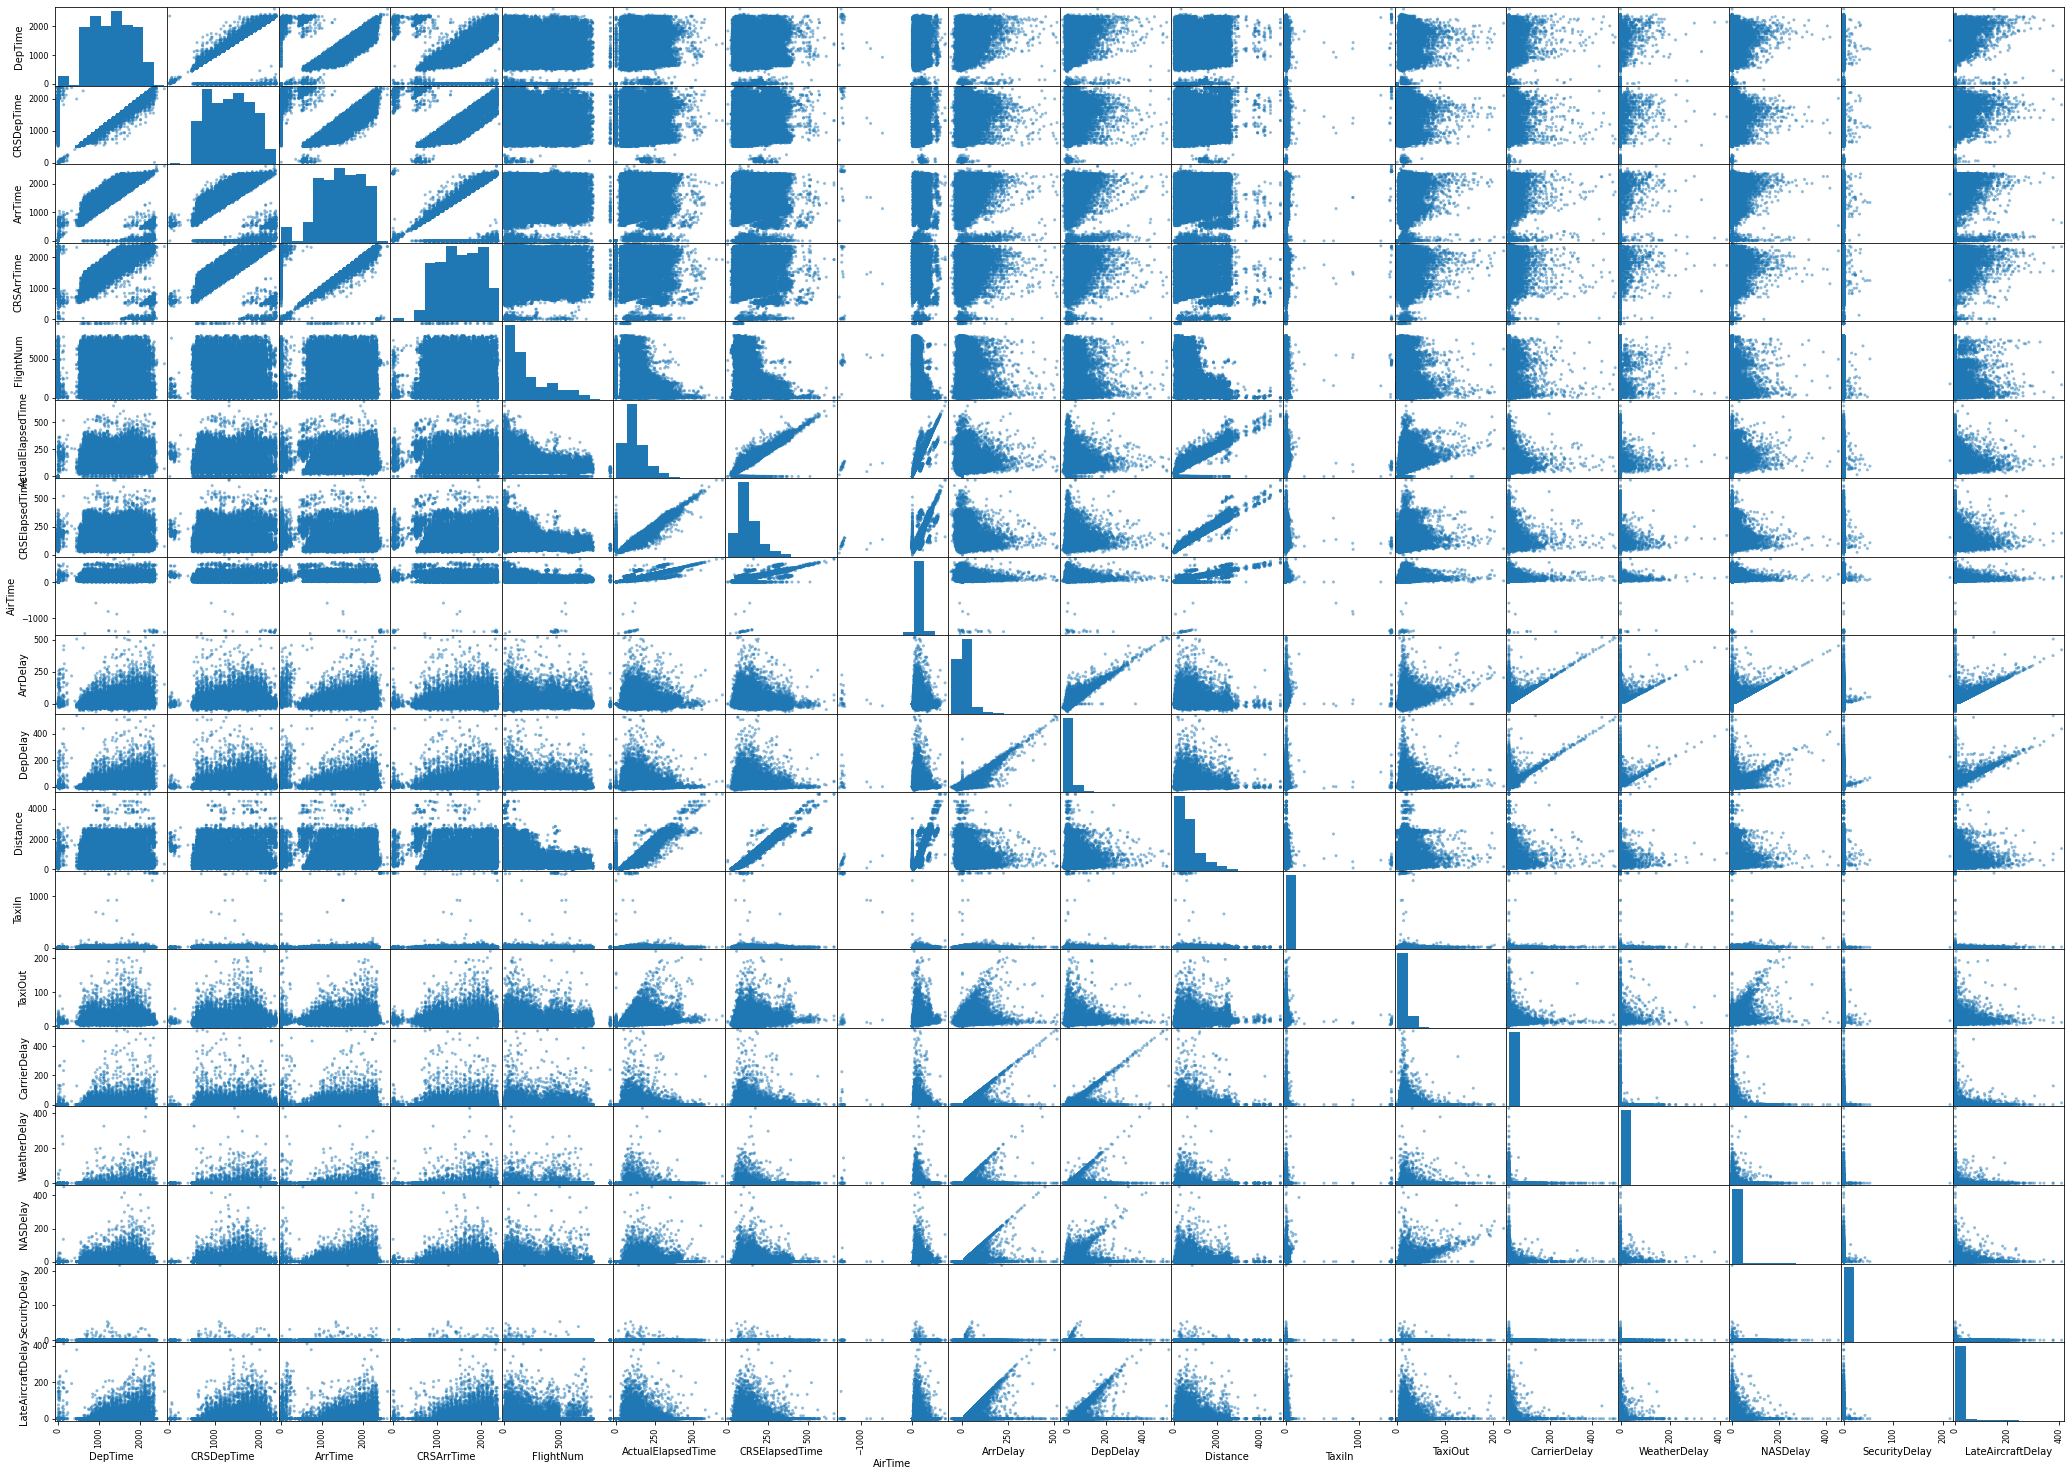

In [101]:
#ploting a scattered plot for all the numeric data using the sample dataframe of 50,000 rows

pd.plotting.scatter_matrix(flight_sample, figsize=(36,26));

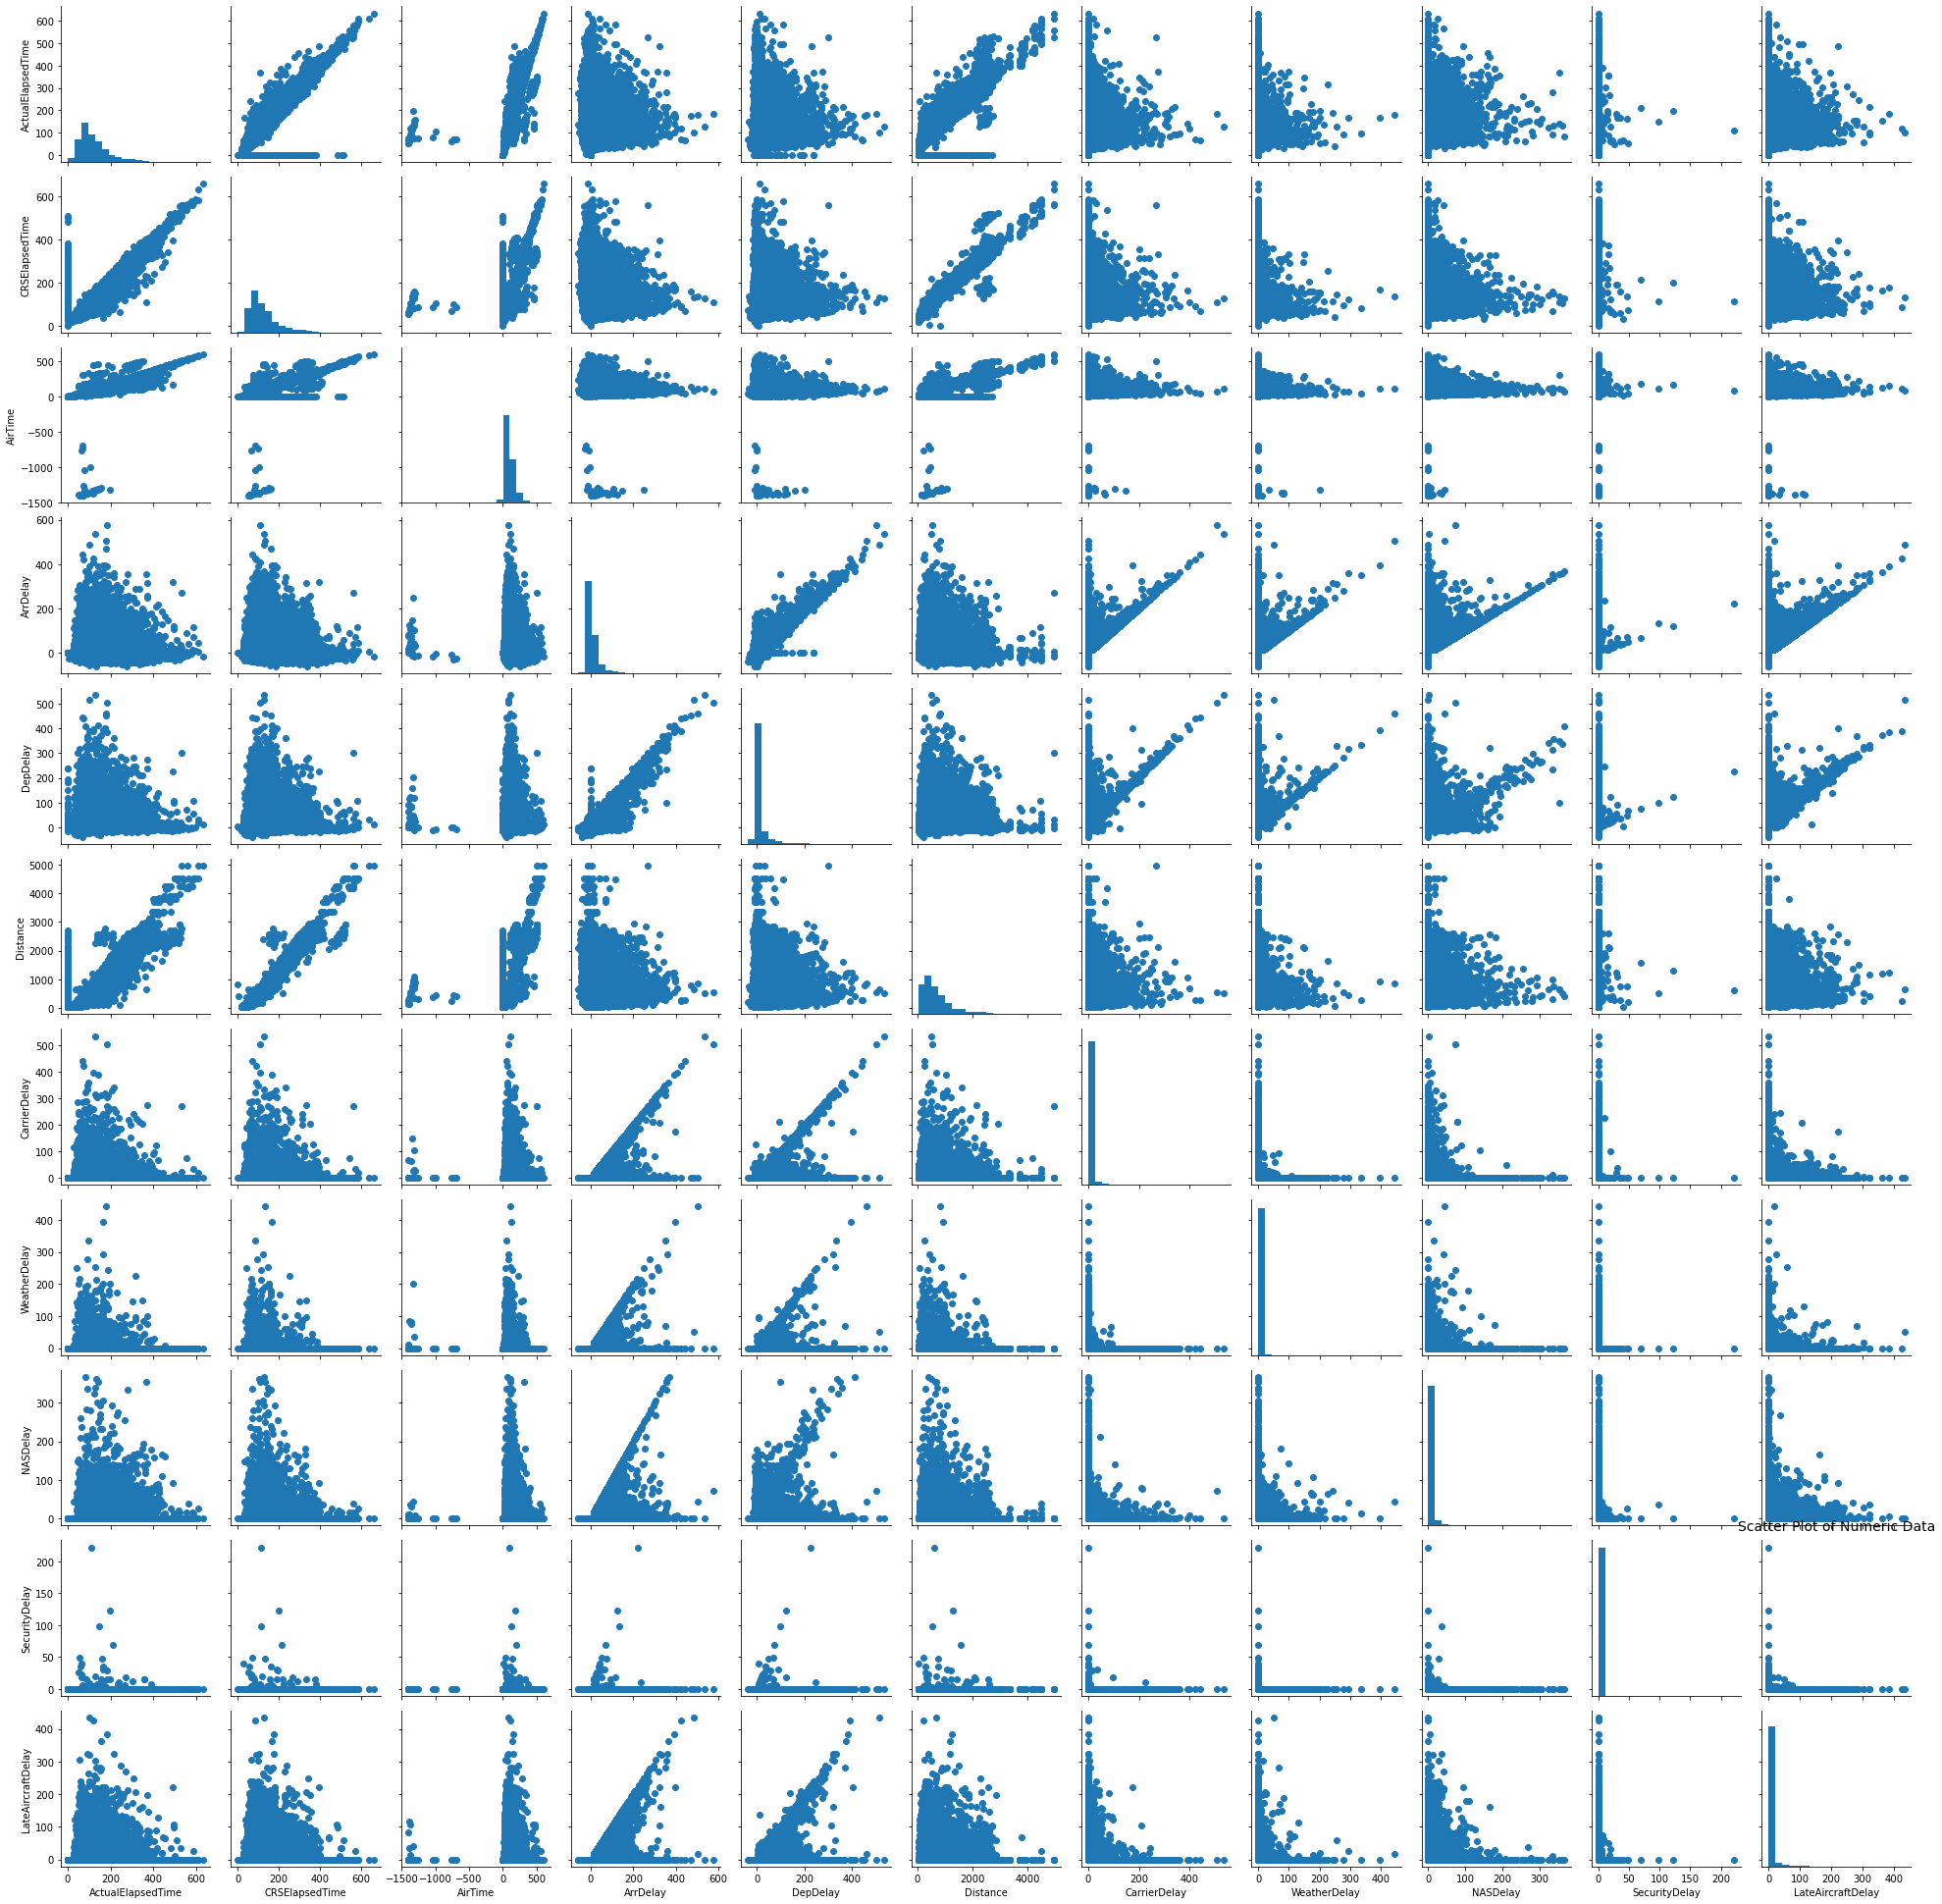

In [43]:
#ploting a scattered plot for some of the numeric data using the sample dataframe of 50,000 rows

numeric_vars = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'CarrierDelay', 
                'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
g = sns.PairGrid(data = flight_sample, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title('Scatter Plot of Numeric Data', fontsize=14, y=1.025);

## Correlation Matrix of Dataset

The entire dataset was observed using a correlation matrix to determine the numerical features that had the most relationship before indepth analysis was performed.

The matrix showed very strong correlation between the departure delays and arrival delays which emphasized that any delays in departure have corresponding effect on the flight arrival.

Additionally, the matrix showed that the major contributing factors to flight delays were the airlines, the National Air System and to some extent, weather.

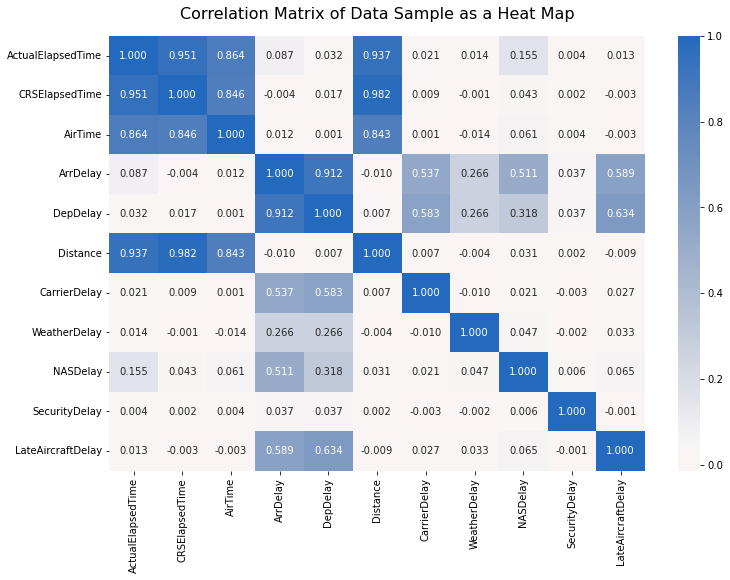

In [115]:
# correlation plot of a sample of the data
plt.figure(figsize = [12, 8])
sns.heatmap(flight_sample[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix of Data Sample as a Heat Map', fontsize=16, y=1.025)
plt.show()

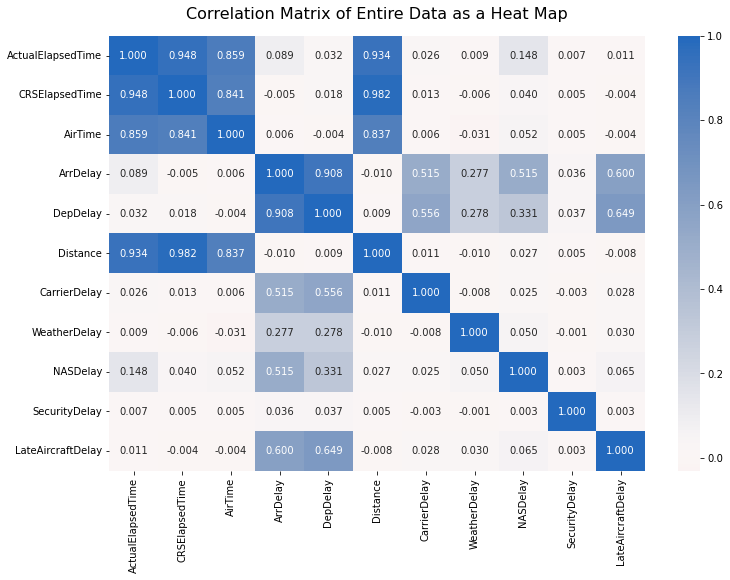

In [44]:
# correlation plot of entire data
plt.figure(figsize = [12, 8])
sns.heatmap(flight_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix of Entire Data as a Heat Map', fontsize=16, y=1.025)
plt.show()

#### The correlation matrix above indicates strong relationships between certain variables 
It can be seen that there is a correlation between the departure delays flights experience and the arrival delays of those flights. 
Additionally, there is a relationship between the amount of time spent on air to the distance of flight.
It can aslo be seen that Late aircraft, the airline and National Airspace systems are major contributing factors to delays

## Departure Delays VS Arrival Delays
A deepdive into the relationship between departure and arrival delays shows the obvious strong correlation between them. 
Delayed departure causes delayed arrival for the flights and on time departure results to on time arrival.

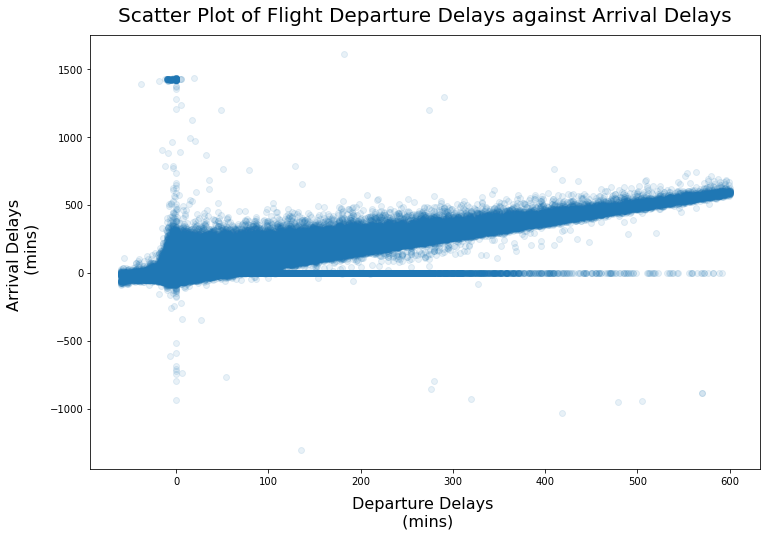

In [46]:
plt.figure(figsize = [12, 8])
plt.scatter(data = flight_df, x ='DepDelay' , y = 'ArrDelay', alpha = 1/10);


plt.title('Scatter Plot of Flight Departure Delays against Arrival Delays', fontsize=20, y=1.015)
plt.xlabel('Departure Delays \n (mins)', labelpad=10, fontsize=16);
plt.ylabel('Arrival Delays \n (mins)', labelpad=10, fontsize=16);

In [47]:
#Create a dataframe of the average delays per month

df_months = flight_df.groupby('Month').mean().reset_index()

In [118]:
df_months

,Month,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,January,1310.219509,1337.594929,1455.805386,1504.062797,2157.704147,121.568725,126.094244,100.288053,7.277132,8.636745,711.348029,7.040496,15.638199,2.786213,0.673578,3.145929,0.017407,3.525414
1,February,1307.053541,1337.675643,1450.394634,1503.640999,2161.575870,121.705141,126.450119,100.546064,8.366226,9.421717,714.370631,7.010972,15.621919,2.840237,0.660985,3.196059,0.020346,3.807352
2,March,1319.751260,1337.734161,1462.418632,1502.017882,2150.603762,122.994410,127.033846,101.979353,7.033415,8.755790,719.825833,6.930663,15.512858,2.710515,0.485819,2.982878,0.021594,3.665716
3,April,1321.727732,1334.745216,1469.020260,1499.120422,2139.841921,122.200705,125.881644,101.464495,4.410187,6.441712,718.267674,6.958851,15.212726,2.281117,0.363707,2.483381,0.018092,2.870917
4,May,1325.424717,1336.303487,1470.902731,1500.690300,2114.466694,121.964057,125.027566,101.101215,5.216839,6.827719,717.670137,7.129669,15.476957,2.152643,0.493377,2.699389,0.011184,2.910383
5,June,1321.671332,1337.348605,1454.380415,1498.229627,2097.977341,122.908195,125.784430,100.872881,10.478492,11.207674,726.576325,7.700359,16.184087,3.511726,0.964118,4.104409,0.026997,4.956243
6,July,1320.941525,1337.609394,1451.448223,1498.297337,2087.331382,122.888406,126.133281,100.662036,10.767825,11.725772,730.249831,7.841367,16.275591,3.674984,0.914263,4.097322,0.023155,5.257432
7,August,1320.410830,1337.611761,1455.786996,1498.714731,2075.003639,122.426184,125.768085,99.634940,8.620705,9.716547,726.769566,7.581895,16.119414,3.311431,0.772425,3.564851,0.042475,4.427208
8,September,1311.737911,1333.325800,1462.251200,1499.824526,2095.867843,120.179950,124.470582,98.791670,3.266361,5.218247,715.610378,6.944332,15.362981,2.330280,0.426898,2.657896,0.020122,2.602176
9,November,1322.011575,1333.410356,1470.352219,1499.266528,2090.919534,122.999138,126.359708,101.165848,5.435225,7.272674,717.715234,7.142202,15.652659,2.585080,0.503677,3.319499,0.016979,3.232795


## Flight Delays Per Month
The trends for delays observed for the various months of the year showed that June, July and December had the most average delayed flights.

This phenomenom can be most likely explained as the effect of summer holidays and Christmas holidays with those months which sees travellers rushing to make trips and this can have potential overwhelming effects on both the airlines and airport staff.

Also, it is observed from the trends that September, April and May are the months with the least flight delays and this could be as a result of less activities due to weather impacts. All of these are assumptions that require detailed investigations

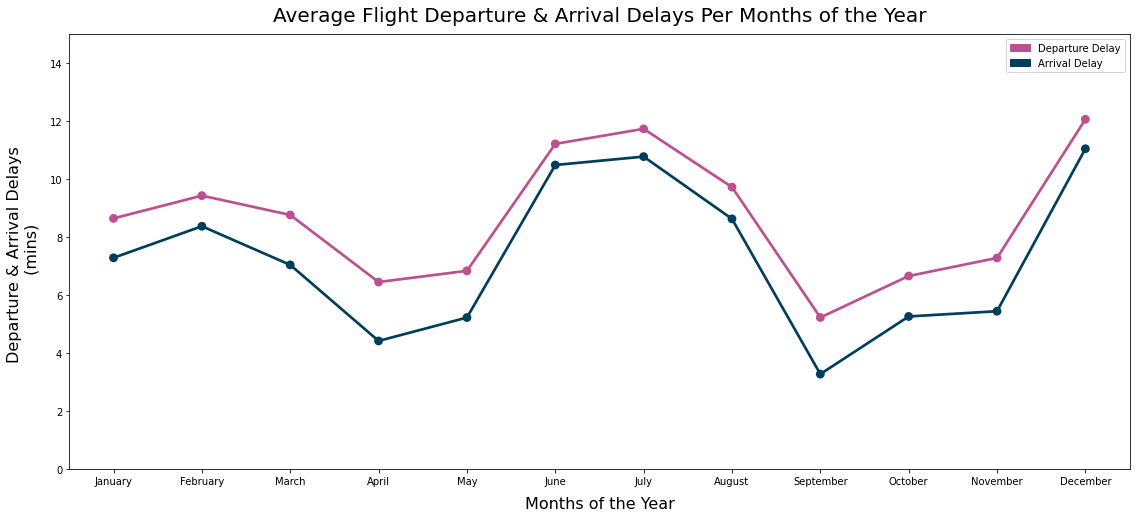

In [48]:
# Plot the trend of delays over the various months 

rcParams['figure.figsize'] = 19,8
fig, ax = plt.subplots()

#weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.pointplot(data=df_months, x='Month', y='DepDelay', color='#bc5090');
sns.pointplot(data=df_months, x='Month', y='ArrDelay', color='#003f5c');


plt.title('Average Flight Departure & Arrival Delays Per Months of the Year', fontsize=20, y=1.015)
plt.xlabel('Months of the Year', labelpad=10, fontsize=16)
plt.ylabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)

ax.set_ylim([0, 15])

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
plt.legend(handles=[DepDelay, ArrDelay]);

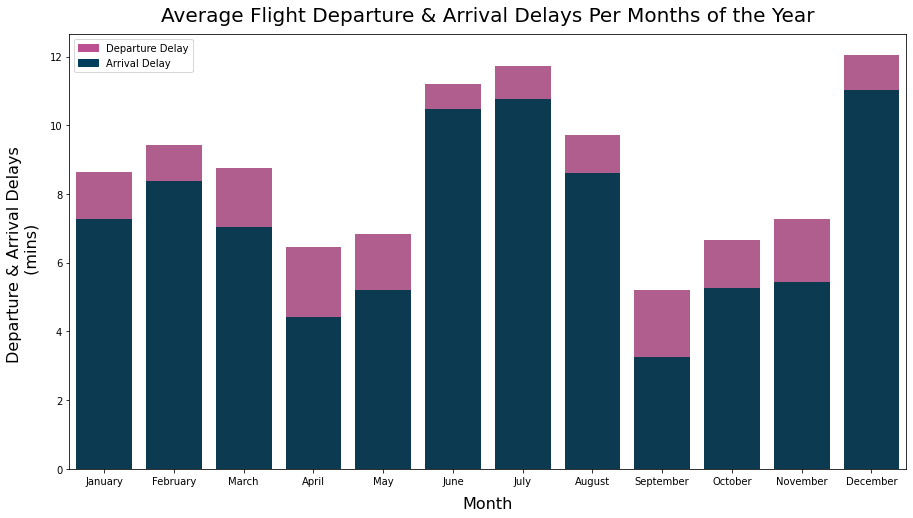

In [53]:
rcParams['figure.figsize'] = 15,8
fig, ax = plt.subplots()
#weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df_months, x='Month', y='DepDelay', color='#bc5090');
sns.barplot(data=df_months, x='Month', y='ArrDelay', color='#003f5c');

plt.title('Average Flight Departure & Arrival Delays Per Months of the Year', fontsize=20, y=1.015)
plt.xlabel('Month', labelpad=10, fontsize=16)
plt.ylabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
plt.legend(handles=[DepDelay, ArrDelay]);

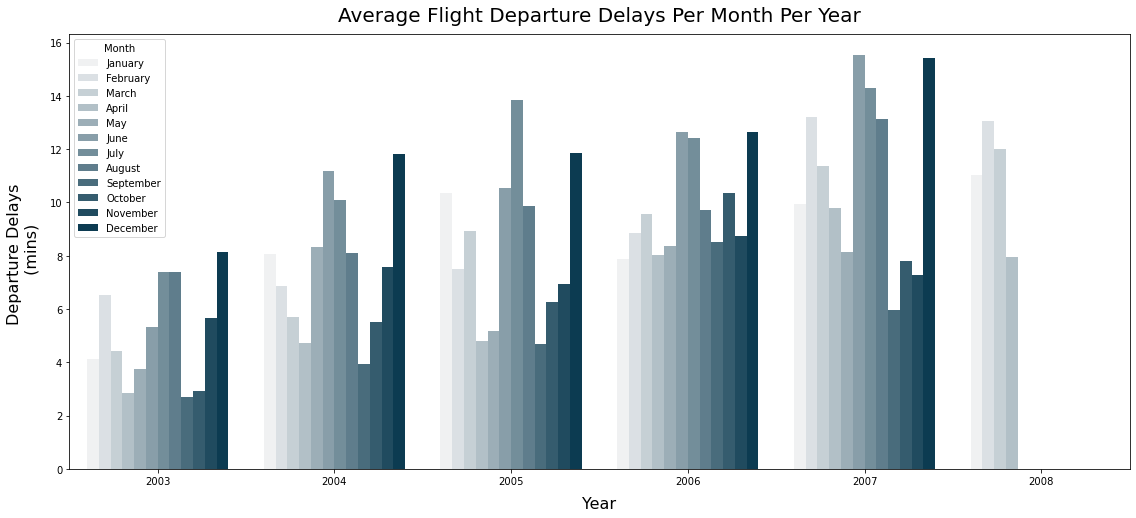

In [58]:
rcParams['figure.figsize'] = 19,8
fig, ax = plt.subplots()

#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

sns.barplot(data=df_years_month, x='Year', y='DepDelay', hue='Month', color='#003f5c');
#sns.barplot(data=df_years_month, x='Year', y='ArrDelay', hue='Month', color='#bc5090');


plt.title('Average Flight Departure Delays Per Month Per Year', fontsize=20, y=1.015);
plt.xlabel('Year', labelpad=10, fontsize=16);
plt.ylabel('Departure Delays \n (mins)', labelpad=10, fontsize=16);


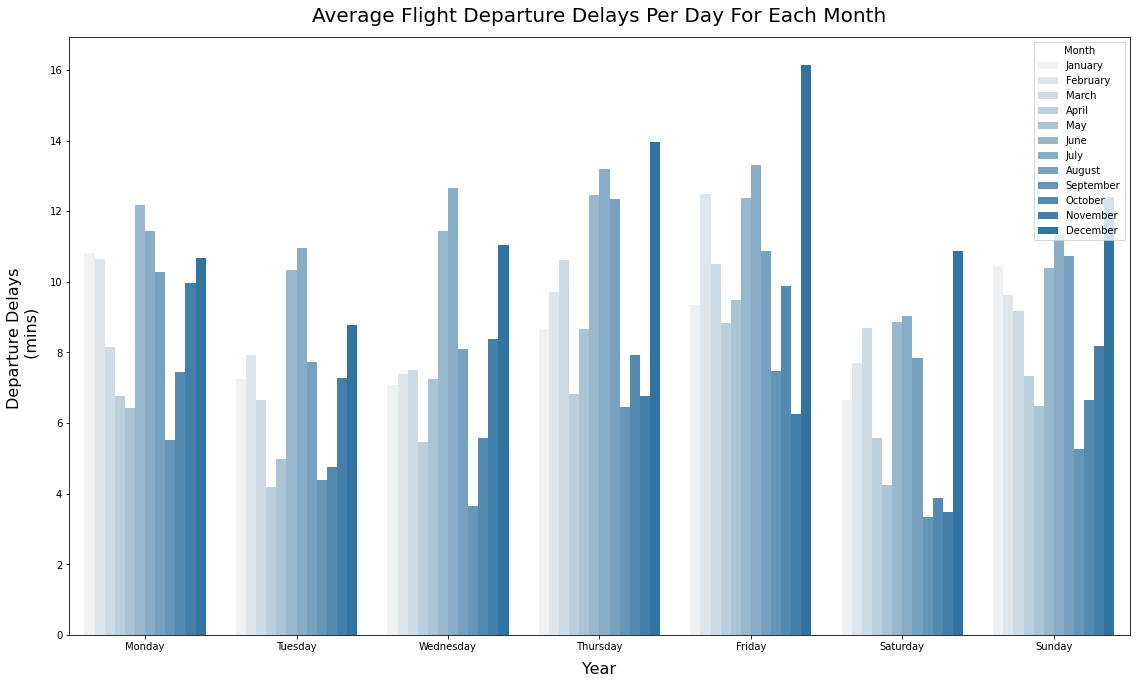

In [59]:
rcParams['figure.figsize'] = 19,11
fig, ax = plt.subplots()

#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

sns.barplot(data=df_month_weekdays, x='DayOfWeek', y='DepDelay', hue='Month', color= base_color);
#sns.barplot(data=df_years_month, x='Year', y='ArrDelay', hue='Month', color='#bc5090');


plt.title('Average Flight Departure Delays Per Day For Each Month', fontsize=20, y=1.015);
plt.ylabel('Departure Delays \n (mins)', labelpad=10, fontsize=16);
plt.xlabel('Year', labelpad=10, fontsize=16);

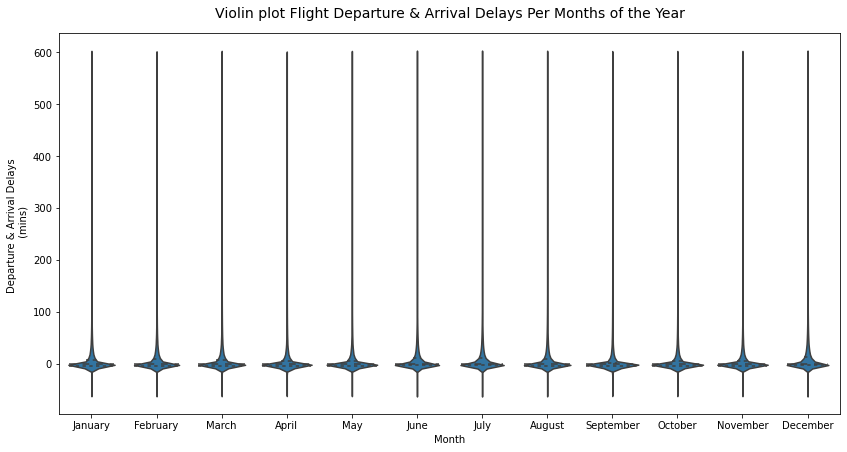

In [50]:
# Violin plot of delays over the various months 

rcParams['figure.figsize'] = 14,7
base_color = sns.color_palette()[0]
sns.violinplot(data=flight_df, x='Month', y='DepDelay', color = base_color, inner='quartile')
ticks = [0, 1]
#labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']
#plt.xticks(ticks, labels)
plt.title('Violin plot Flight Departure & Arrival Delays Per Months of the Year', fontsize=14, y=1.025)
#plt.xlabel('Months')
plt.ylabel('Departure & Arrival Delays \n (mins)');

The above gives a clear indication that December, July and June are the months with the highest average flight delays and this can be likely be attributed to the summer and christmas holidays within those months.

Also, September, April and May are the months with the least flight delays and this could be as a result of less activities due to weather impacts. All of these are my assumptions

In [51]:
df_weekdays = flight_df.groupby('DayOfWeek').mean().reset_index()

In [126]:
df_weekdays

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,Monday,1317.022861,1335.340643,1459.592118,1499.298769,2113.347109,121.573485,125.283221,99.933882,7.813732,9.173509,713.874802,7.226522,15.699925,2.902168,0.674118,3.416074,0.020537,4.049500
1,Tuesday,1314.316936,1335.926443,1459.239308,1500.759023,2109.570694,121.262736,124.978091,99.812517,5.745264,7.057494,711.473489,7.076416,15.677604,2.494479,0.574968,3.235017,0.013905,3.194297
2,Wednesday,1315.236585,1335.795000,1458.084965,1500.123132,2115.242744,121.690585,125.041238,99.892141,6.976287,7.900793,711.766206,7.138367,15.981372,2.606637,0.626894,3.495381,0.018248,3.595516
3,Thursday,1314.522949,1334.249562,1453.301778,1497.411701,2114.347324,122.336226,125.299951,100.086957,9.242244,9.792044,713.944826,7.314588,16.262478,2.971074,0.709061,3.771901,0.026650,4.367126
4,Friday,1319.247423,1336.170666,1457.615095,1498.845689,2112.056353,122.105769,125.337222,100.113084,9.767841,10.602813,714.348522,7.249461,16.072420,3.210932,0.672066,3.703703,0.024578,4.625477
5,Saturday,1292.023914,1306.411565,1447.231150,1476.439194,2119.360796,124.213874,129.389332,103.935335,3.630900,6.761147,748.832116,7.002333,14.708930,2.863386,0.497155,2.094488,0.027162,2.690871
6,Sunday,1348.679978,1365.423096,1487.851765,1528.388815,2112.598322,122.940337,127.109798,101.491844,7.029750,9.027095,729.382387,7.392733,15.394691,3.081727,0.615432,2.993342,0.026648,3.813552


## Flight Delays Per Days Of The Week
The investigation showed that Friday, Thursday as well as Sunday and Monday are the days with the most average delayed flights. This could possibly be explained using the weekend factor that sees many people travelling for various reasons.

Saturday has the least average flight delays and this could be as a result of reduced activities at the airports because many people already flew into or out of town the previous day.

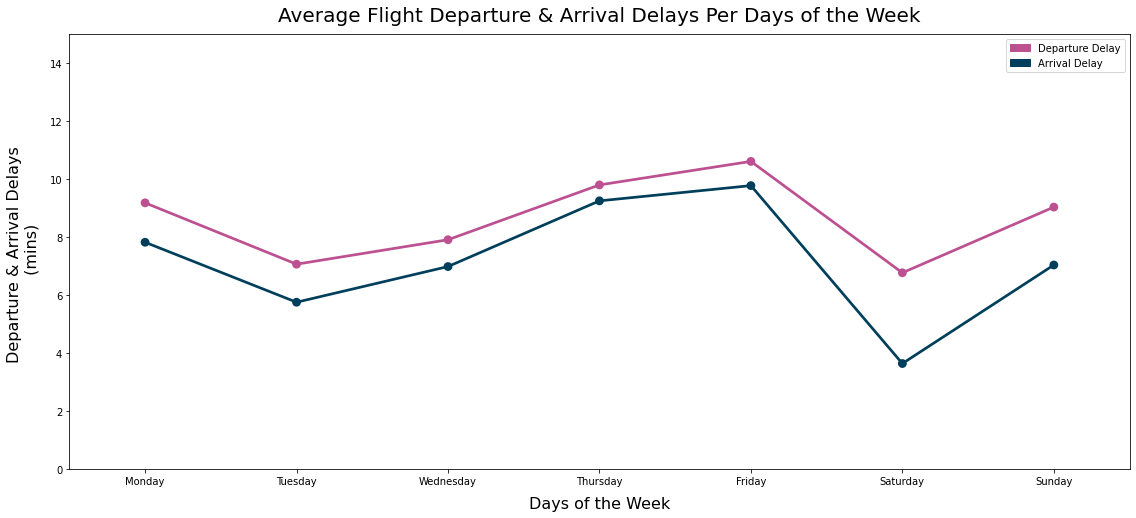

In [54]:
rcParams['figure.figsize'] = 19,8
fig, ax = plt.subplots()

#weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.pointplot(data=df_weekdays, x='DayOfWeek', y='DepDelay', color='#bc5090');
sns.pointplot(data=df_weekdays, x='DayOfWeek', y='ArrDelay', color='#003f5c');


plt.title('Average Flight Departure & Arrival Delays Per Days of the Week', fontsize=20, y=1.015)
plt.xlabel('Days of the Week', labelpad=10, fontsize=16)
plt.ylabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)

ax.set_ylim([0, 15])

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
plt.legend(handles=[DepDelay, ArrDelay]);

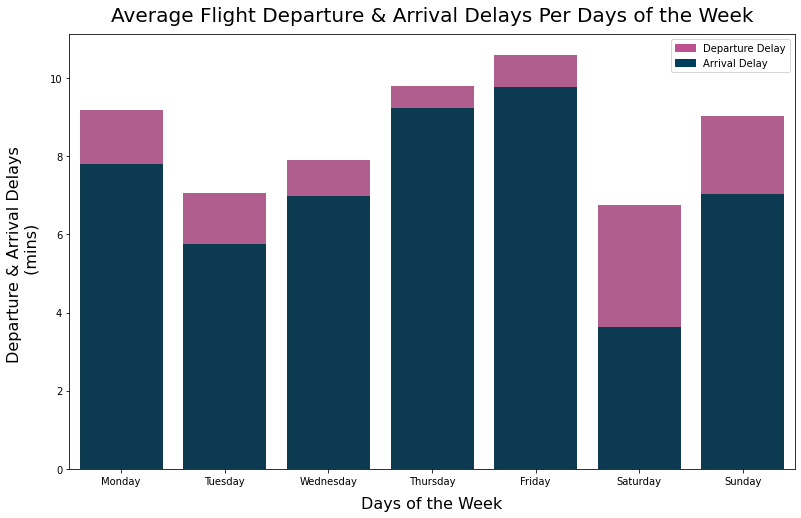

In [55]:
rcParams['figure.figsize'] = 13,8
fig, ax = plt.subplots()
#weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df_weekdays, x='DayOfWeek', y='DepDelay', color='#bc5090');
sns.barplot(data=df_weekdays, x='DayOfWeek', y='ArrDelay', color='#003f5c');

plt.title('Average Flight Departure & Arrival Delays Per Days of the Week', fontsize=20, y=1.015)
plt.xlabel('Days of the Week', labelpad=10, fontsize=16)
plt.ylabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
plt.legend(handles=[DepDelay, ArrDelay]);

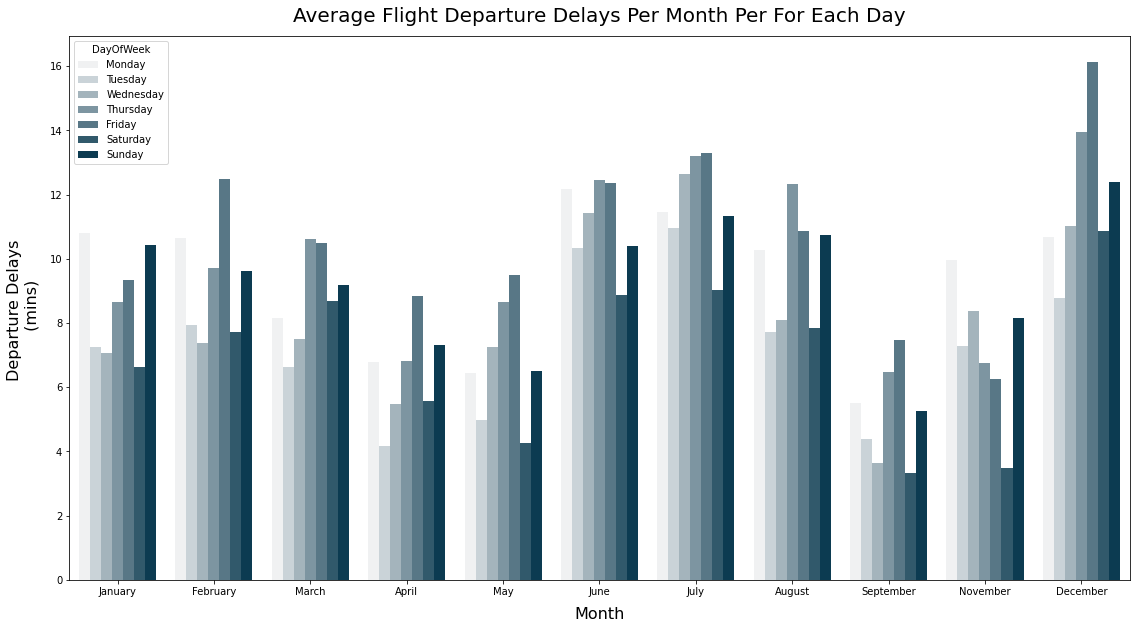

In [224]:
rcParams['figure.figsize'] = 19,10
fig, ax = plt.subplots()

#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

sns.barplot(data=df_month_weekdays, x='Month', y='DepDelay', hue='DayOfWeek', color='#003f5c');
#sns.barplot(data=df_years_month, x='Year', y='ArrDelay', hue='Month', color='#bc5090');


plt.title('Average Flight Departure Delays Per Month For Each Day', fontsize=20, y=1.015);
plt.xlabel('Month', labelpad=10, fontsize=16);
plt.ylabel('Departure Delays \n (mins)', labelpad=10, fontsize=16);

In [130]:
df_years = flight_df.groupby('Year').mean().reset_index()

In [131]:
df_years

,Year,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1323.691785,1341.203089,1478.229520,1510.034870,2013.337332,120.242552,123.783980,102.587140,3.466596,5.106792,711.407869,7.052982,15.085420,1.290189,0.300377,1.824745,0.012433,1.542409
1,2004,1322.454991,1340.776257,1466.957332,1503.653723,2091.448403,120.927751,124.448826,100.187119,6.300787,7.673023,713.575697,7.843915,15.722129,2.586037,0.696129,3.428941,0.025138,3.437274
2,2005,1319.391628,1337.953107,1460.601715,1499.828692,2042.720162,122.124151,125.901508,99.156914,6.938397,8.438173,723.711986,7.567385,15.432282,2.935100,0.649852,3.362485,0.019752,3.651908
3,2006,1317.530385,1332.236800,1458.198163,1495.759524,2186.829745,123.606857,127.180702,100.854114,8.423315,9.841164,727.966861,7.058027,15.744665,3.327100,0.671558,3.581597,0.030996,4.504022
4,2007,1310.362022,1330.585286,1446.758449,1495.386105,2188.111007,123.301806,127.229646,100.358097,9.809984,11.013889,719.776516,6.691520,16.299120,3.760127,0.755412,3.776973,0.023737,5.087145
5,2008,1303.885433,1329.992807,1442.274740,1496.749184,2213.874016,124.841941,129.353448,102.016128,9.843099,10.998441,726.141456,6.638737,16.234712,3.756546,0.707930,3.944971,0.019690,5.121355


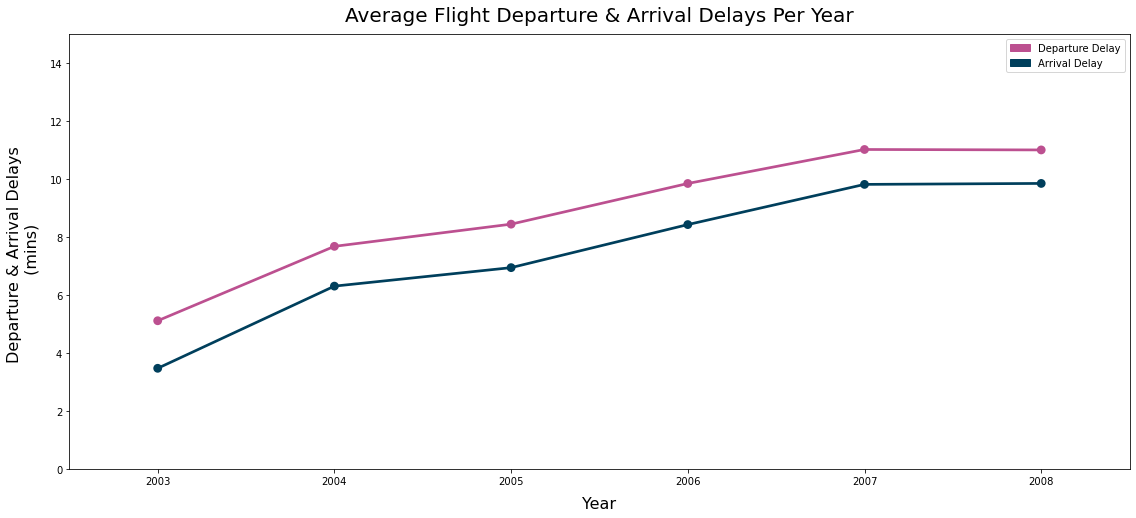

In [132]:
rcParams['figure.figsize'] = 19,8
fig, ax = plt.subplots()

sns.pointplot(data=df_years, x='Year', y='DepDelay', color='#bc5090');
sns.pointplot(data=df_years, x='Year', y='ArrDelay', color='#003f5c');


plt.title('Average Flight Departure & Arrival Delays Per Year', fontsize=20, y=1.015)
plt.xlabel('Year', labelpad=10, fontsize=16)
plt.ylabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)

ax.set_ylim([0, 15])

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
plt.legend(handles=[DepDelay, ArrDelay]);

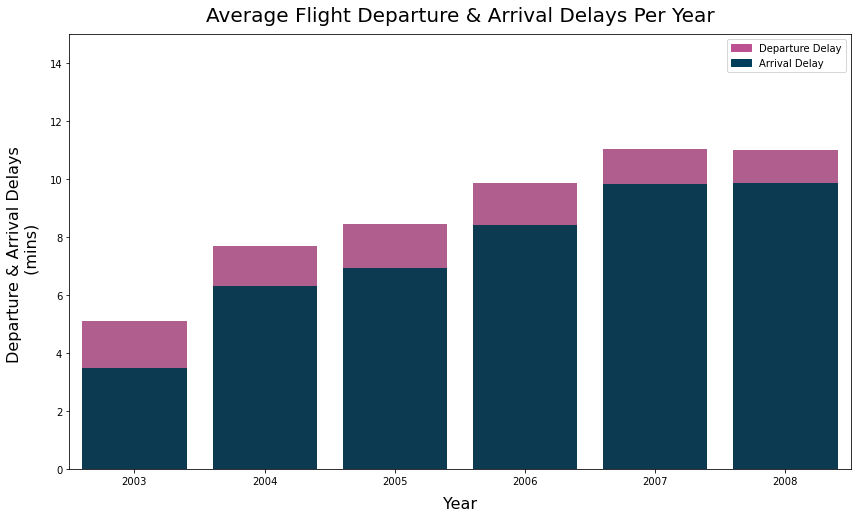

In [133]:
rcParams['figure.figsize'] = 14,8
fig, ax = plt.subplots()

sns.barplot(data=df_years, x='Year', y='DepDelay', color='#bc5090');
sns.barplot(data=df_years, x='Year', y='ArrDelay', color='#003f5c');


plt.title('Average Flight Departure & Arrival Delays Per Year', fontsize=20, y=1.015)
plt.xlabel('Year', labelpad=10, fontsize=16)
plt.ylabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)

ax.set_ylim([0, 15])

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
plt.legend(handles=[DepDelay, ArrDelay]);

The trends above show a steady increase in the average flight delays from 2003 to 2008. This may require more deepdive to determine the likely reason

## Multivariate Exploration

In [56]:
#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']
df_years_month = flight_df.groupby(['Year', 'Month']).mean().reset_index()

In [138]:
df_years_month

,Year,Month,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,January,1327.133358,1344.194791,1483.070194,1513.841902,2043.127082,119.667812,123.395042,102.216741,2.092595,4.119530,695.316744,6.147034,14.903686,0.0,0.0,0.0,0.0,0.0
1,2003,February,1296.773970,1344.173659,1446.312062,1514.659895,2040.196388,117.998576,123.772344,101.018114,5.690941,6.528476,699.189504,6.078334,14.894850,0.0,0.0,0.0,0.0,0.0
2,2003,March,1324.698500,1344.886716,1478.563053,1514.565498,2033.316074,120.396157,124.463076,103.571767,2.394293,4.416930,705.059460,6.196080,14.709935,0.0,0.0,0.0,0.0,0.0
3,2003,April,1326.008457,1341.398572,1484.908989,1510.968953,2013.157128,118.815218,123.522113,101.798875,-0.439172,2.853296,704.612167,7.084952,14.144588,0.0,0.0,0.0,0.0,0.0
4,2003,May,1332.006138,1341.129253,1489.791490,1509.864677,2002.987071,119.818021,122.994192,101.989649,1.548563,3.759505,705.119012,7.402149,14.674269,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2008,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2008,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2008,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2008,November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
#Check the entries for 2008 to verify that the data available ended in April
df_years_month.tail(12)

,Year,Month,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
54,2007,December,1297.895906,1329.828098,1429.330998,1495.515020,2185.809293,125.277251,129.574200,101.504975,15.413078,15.438539,727.391660,6.921275,16.904802,5.078789,1.094102,4.948578,0.029544,6.936167
55,2008,January,1302.991027,1330.348545,1445.305951,1499.847294,2229.791959,124.347006,129.014711,101.398557,9.765960,11.039004,720.248472,6.676052,16.315727,3.804765,0.694450,3.993681,0.021318,5.188598
56,2008,February,1295.064938,1330.898974,1429.242581,1498.168777,2230.493929,124.366052,129.498085,101.188426,12.407330,13.052686,724.641295,6.657716,16.581032,4.106717,0.934934,4.507529,0.019962,6.122494
57,2008,March,1306.837067,1331.167723,1441.518438,1495.877009,2204.019986,125.897477,130.494731,103.131987,10.728588,12.019356,733.776072,6.676674,16.140170,3.999607,0.766857,4.022944,0.024541,5.408519
58,2008,April,1310.145092,1327.560043,1452.385835,1493.158943,2192.086309,124.708882,128.383363,102.279939,6.568947,7.950929,725.673696,6.543812,15.920466,3.124127,0.444862,3.279974,0.012783,3.804753
59,2008,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2008,June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2008,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2008,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2008,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_month_weekdays = flight_df.groupby(['Month', 'DayOfWeek']).mean().reset_index()

In [143]:
df_month_weekdays

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,January,Monday,1312.522275,1335.151763,1455.060273,1501.187315,2157.807629,121.201392,125.414601,99.438975,9.642931,10.801464,705.550253,7.234072,15.744496,3.177801,0.872818,3.752148,0.018876,4.624529
1,January,Tuesday,1311.351604,1337.278361,1460.441300,1504.487157,2161.800431,120.933284,125.228149,99.892607,5.711228,7.239972,703.299133,6.745026,15.500175,2.618715,0.530340,3.017550,0.014977,3.088806
2,January,Wednesday,1309.139727,1338.163093,1456.774019,1504.852021,2163.736680,120.677424,125.177639,99.618516,5.791967,7.078977,702.683492,6.734632,15.689416,2.416009,0.554702,2.951289,0.013284,2.913037
3,January,Thursday,1313.885378,1337.158752,1457.695695,1502.302194,2159.534274,121.867541,125.400508,100.248200,7.909734,8.667676,705.412955,7.093661,16.034743,2.605137,0.696039,3.270501,0.013325,3.566033
4,January,Friday,1314.406289,1337.024761,1458.127270,1501.666846,2151.745786,121.618588,125.237498,100.342829,8.362920,9.333234,704.927108,7.004493,15.850249,2.711208,0.636852,3.282728,0.016160,3.753287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,December,Wednesday,1310.534695,1333.252502,1453.870099,1499.038618,2076.562688,123.020510,126.739903,100.621205,10.192524,11.037072,717.881342,7.332553,16.112645,3.530519,0.755086,3.990656,0.032605,4.799107
73,December,Thursday,1303.667301,1336.660242,1436.284634,1500.461512,2078.118461,123.057604,127.159034,100.012518,13.675848,13.950743,720.645232,7.566818,16.329019,4.127453,0.973543,4.971436,0.031225,6.064957
74,December,Friday,1305.866877,1334.246714,1435.213456,1498.058896,2073.937070,122.787357,127.261190,99.990696,15.765402,16.131351,721.486573,7.335771,16.292121,4.663325,1.162994,5.042106,0.034069,7.159039
75,December,Saturday,1282.882541,1305.942654,1432.697393,1476.107576,2077.978503,125.592882,131.152329,104.104684,8.563061,10.860425,753.889927,7.130699,15.266735,4.147128,0.796740,3.126160,0.035468,4.323536


In [146]:
df_year_month_weekdays = flight_df.groupby(['Year', 'Month', 'DayOfWeek']).mean().reset_index()

In [147]:
df_year_month_weekdays

,Year,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,January,Monday,1324.523482,1339.810419,1480.476478,1508.573875,2034.476356,118.663817,122.529006,...,1.202237,3.508300,688.506895,6.112768,14.718978,0.0,0.0,0.0,0.0,0.0
1,2003,January,Tuesday,1320.793013,1343.679564,1477.546852,1512.556635,2039.437242,117.902568,122.122709,...,-0.235883,2.166080,684.796522,5.962849,14.415956,0.0,0.0,0.0,0.0,0.0
2,2003,January,Wednesday,1331.334714,1350.029425,1489.735749,1519.425824,2044.563407,119.408968,123.107438,...,1.234275,3.203038,692.506031,6.012288,14.701373,0.0,0.0,0.0,0.0,0.0
3,2003,January,Thursday,1322.210905,1341.950424,1475.073189,1510.348632,2037.089321,119.243082,122.588584,...,4.137359,5.306873,688.953315,6.290221,15.248246,0.0,0.0,0.0,0.0,0.0
4,2003,January,Friday,1325.458781,1341.883542,1479.796383,1510.452766,2038.135871,119.347702,122.642435,...,3.689885,5.200977,689.454954,6.098920,15.289333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2008,December,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2008,December,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,2008,December,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2008,December,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the above charts supports the origin position previously observed in the bivariate exploration

In [192]:
df_carrier = flight_df.groupby('UniqueCarrier').mean().reset_index().sort_values(['DepDelay'], ascending = False)

In [193]:
df_carrier

,UniqueCarrier,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
8,EV,1319.912312,1342.454732,1458.766423,1481.179043,4478.586070,90.212502,96.144802,51.184388,10.472960,13.323556,452.395766,24.177069,14.880416,5.622441,2.296742,3.816344,0.019997,1.739058
22,YV,1317.866518,1363.032082,1403.371612,1469.609101,5282.880517,84.916192,90.203063,62.567974,11.063257,12.807473,399.345941,6.721133,15.664992,6.218178,0.556563,2.359594,0.029354,6.047495
4,B6,1346.107355,1370.575493,1419.045681,1485.415330,386.829088,185.955246,190.677219,159.660069,8.974078,11.097054,1214.614417,6.023280,20.396082,2.407927,0.391695,5.375139,0.056120,5.757172
10,FL,1347.741878,1357.594007,1464.919415,1494.888471,493.315849,117.003662,119.253137,94.038883,9.549501,10.350610,656.409345,7.464555,15.545443,1.793082,0.130554,4.369197,0.000000,6.525950
20,WN,1353.465304,1352.858075,1483.975760,1508.005902,1316.310875,100.289288,105.952863,86.046146,5.021043,9.690001,601.619347,4.129367,10.112289,1.577399,0.321423,1.185418,0.028438,4.695665
18,UA,1310.904243,1326.388326,1461.776944,1507.185284,740.602490,164.015599,168.384593,140.257854,7.976176,9.463667,1074.936548,6.244798,17.554969,2.770120,0.316542,4.004421,0.004896,4.935282
1,AA,1296.083413,1315.069913,1484.112991,1534.450225,1293.790895,164.004914,168.530576,139.345676,8.448820,9.380361,1070.407056,8.250518,16.819557,2.955289,0.857904,4.098385,0.018659,4.137520
3,AS,1329.803607,1347.052987,1454.143346,1500.054853,333.803436,137.411300,141.461048,118.526703,7.710047,9.336149,872.412051,5.894671,13.148854,4.076260,0.181021,1.947390,0.073984,4.895640
6,DH,1312.334752,1348.440907,1422.156464,1482.741270,5174.742547,83.413520,89.110174,61.533938,6.555868,9.291647,374.860777,5.560162,15.918400,1.969034,0.507145,3.062528,0.010457,4.583911
13,MQ,1272.131389,1310.782472,1394.785031,1454.427001,3945.017460,83.449369,86.923612,61.516658,9.002291,9.141727,388.406354,6.797384,15.380555,2.948788,0.677848,3.531568,0.005798,5.048129


In [194]:
df_carrier.shape

(23, 19)

In [177]:
carrier_df = pd.read_csv('carriers.csv')

In [195]:
carrier_df.head()

,UniqueCarrier,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [181]:
carrier_df.shape

(1491, 2)

In [183]:
carrier_df.rename(columns = {'Code':'UniqueCarrier'}, inplace = True)

In [184]:
carrier_df.head()

,UniqueCarrier,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [196]:
carrier_airlines = df_carrier.merge(carrier_df, on = 'UniqueCarrier')

In [197]:
carrier_airlines.head()

,UniqueCarrier,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description
0,EV,1319.912312,1342.454732,1458.766423,1481.179043,4478.586070,90.212502,96.144802,51.184388,10.472960,13.323556,452.395766,24.177069,14.880416,5.622441,2.296742,3.816344,0.019997,1.739058,Atlantic Southeast Airlines
1,YV,1317.866518,1363.032082,1403.371612,1469.609101,5282.880517,84.916192,90.203063,62.567974,11.063257,12.807473,399.345941,6.721133,15.664992,6.218178,0.556563,2.359594,0.029354,6.047495,Mesa Airlines Inc.
2,B6,1346.107355,1370.575493,1419.045681,1485.415330,386.829088,185.955246,190.677219,159.660069,8.974078,11.097054,1214.614417,6.023280,20.396082,2.407927,0.391695,5.375139,0.056120,5.757172,JetBlue Airways
3,FL,1347.741878,1357.594007,1464.919415,1494.888471,493.315849,117.003662,119.253137,94.038883,9.549501,10.350610,656.409345,7.464555,15.545443,1.793082,0.130554,4.369197,0.000000,6.525950,AirTran Airways Corporation
4,WN,1353.465304,1352.858075,1483.975760,1508.005902,1316.310875,100.289288,105.952863,86.046146,5.021043,9.690001,601.619347,4.129367,10.112289,1.577399,0.321423,1.185418,0.028438,4.695665,Southwest Airlines Co.


In [187]:
carrier_airlines.shape

(23, 20)

In [200]:
carrier_airlines['Description'].value_counts()

Atlantic Southeast Airlines                                                            1
Continental Air Lines Inc.                                                             1
Aloha Airlines Inc.                                                                    1
Northwest Airlines Inc.                                                                1
ATA Airlines d/b/a ATA                                                                 1
Frontier Airlines Inc.                                                                 1
America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)     1
Delta Air Lines Inc.                                                                   1
Skywest Airlines Inc.                                                                  1
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    1
Expressjet Airlines Inc.                                                               1
Comair Inc.          

In [202]:
carrier_airlines['Description'] = carrier_airlines['Description'].replace('America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)', 'America West Airlines Inc.')
carrier_airlines['Description'] = carrier_airlines['Description'].replace('US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 'US Airways Inc.')

In [203]:
carrier_airlines['Description'].value_counts()

Atlantic Southeast Airlines     1
Continental Air Lines Inc.      1
Aloha Airlines Inc.             1
Northwest Airlines Inc.         1
ATA Airlines d/b/a ATA          1
Frontier Airlines Inc.          1
America West Airlines Inc.      1
Delta Air Lines Inc.            1
Skywest Airlines Inc.           1
US Airways Inc.                 1
Expressjet Airlines Inc.        1
Comair Inc.                     1
Mesa Airlines Inc.              1
Pinnacle Airlines Inc.          1
American Eagle Airlines Inc.    1
Independence Air                1
Alaska Airlines Inc.            1
American Airlines Inc.          1
United Air Lines Inc.           1
Southwest Airlines Co.          1
AirTran Airways Corporation     1
JetBlue Airways                 1
Hawaiian Airlines Inc.          1
Name: Description, dtype: int64

In [158]:
w = df_carrier['UniqueCarrier'].value_counts().index[:23]
w

Index(['9E', 'HP', 'XE', 'WN', 'US', 'UA', 'TZ', 'OO', 'OH', 'NW', 'MQ', 'HA',
       'AA', 'FL', 'F9', 'EV', 'DL', 'DH', 'CO', 'B6', 'AS', 'AQ', 'YV'],
      dtype='object')

## Average Flight Delays By Airlines 
The investigation showed that Atlantic Southwest, Mesa and Jetblue make up the 3 airlines with the most average delayed flights while Hawaiian, Aloha and Northwest represent the 3 airlines with the least or no flight delays.

The reasons for these results would be subject of another detailed investagion

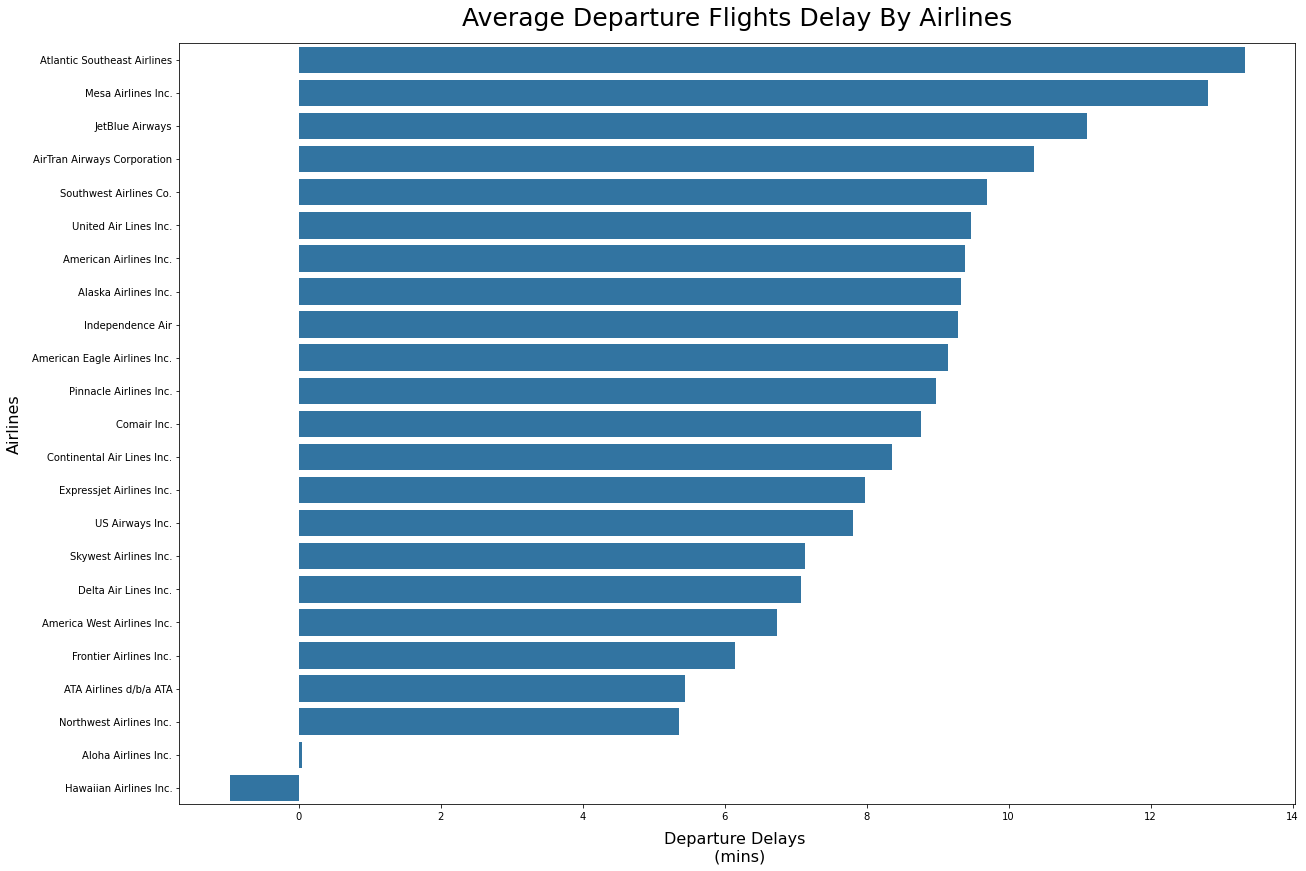

In [207]:
rcParams['figure.figsize'] = 20,14
fig, ax = plt.subplots()

#w = df_carrier['UniqueCarrier'].value_counts().index[:23]

sns.barplot(data=carrier_airlines, y='Description', x='DepDelay', color = sns.color_palette()[0]);
#sns.barplot(data=df_carrier, x='UniqueCarrier', y='ArrDelay', color='#003f5c');


plt.title('Average Departure Flights Delay By Airlines', fontsize=25, y=1.015)
plt.xlabel('Departure Delays \n (mins)', labelpad=10, fontsize=16)
plt.ylabel('Airlines', labelpad=10, fontsize=16);

#ax.set_ylim([0, 15])

#DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
#ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
#plt.legend(handles=[DepDelay, ArrDelay]);

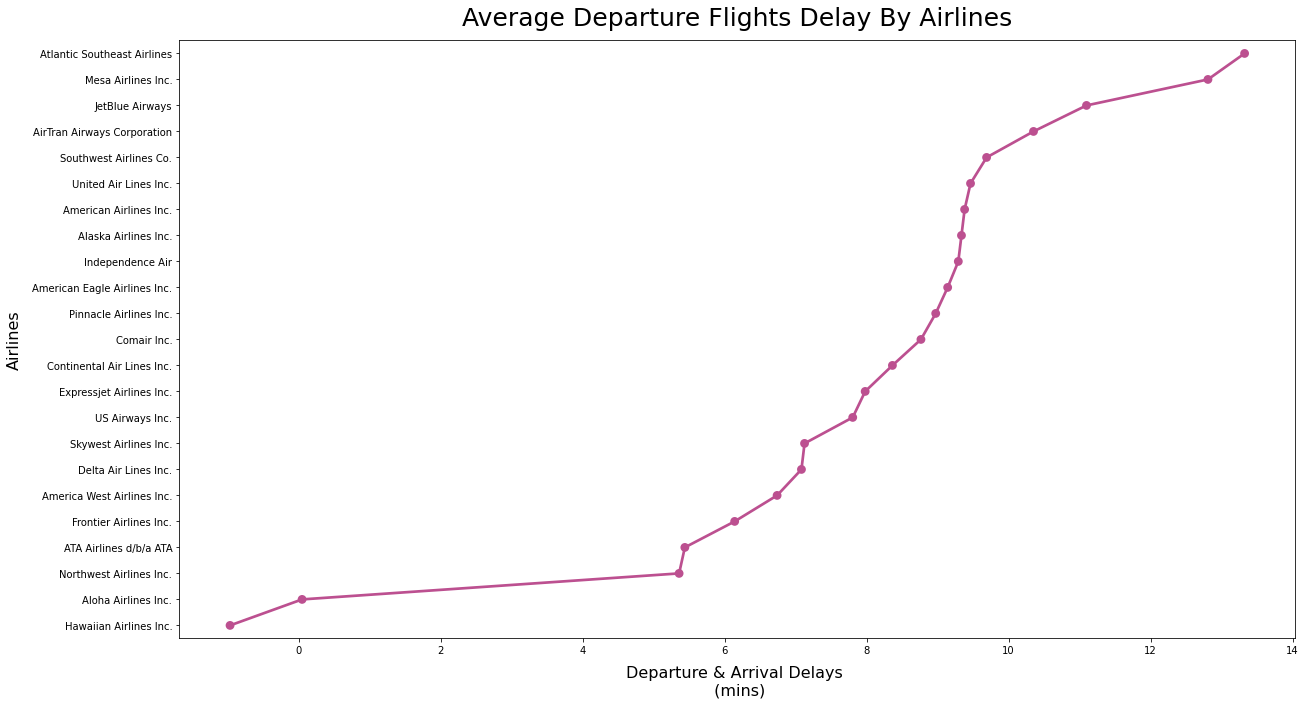

In [214]:
rcParams['figure.figsize'] = 20,11
fig, ax = plt.subplots()

sns.pointplot(data=carrier_airlines, y='Description', x='DepDelay', color='#bc5090');
#sns.pointplot(data=carrier_airlines, y='Description', x='ArrDelay', color='#003f5c');


plt.title('Average Departure Flights Delay By Airlines', fontsize=25, y=1.015)
plt.xlabel('Departure & Arrival Delays \n (mins)', labelpad=10, fontsize=16)
plt.ylabel('Airlines', labelpad=10, fontsize=16)

#ax.set_ylim([0, 15])

DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
#plt.legend(handles=[DepDelay, ArrDelay]);

In [234]:
df_Origin = flight_df.groupby('Origin').mean().reset_index().sort_values(['DepDelay'], ascending = False)

In [235]:
df_Origin.head()

,Origin,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
113,FMN,1334.000000,997.000000,1411.000000,1113.666667,3874.000000,37.000000,76.666667,24.000000,164.000000,203.666667,148.000000,4.666667,8.333333,0.000000,64.333333,0.0,0.0,0.0
78,CYS,1600.000000,1375.000000,1673.500000,1471.500000,6598.000000,33.500000,56.500000,20.500000,122.000000,145.000000,90.000000,5.000000,8.000000,0.000000,122.000000,0.0,0.0,0.0
221,OGD,1334.000000,1097.000000,1279.500000,1243.666667,3786.166667,54.666667,93.333333,43.833333,123.666667,143.666667,28.000000,4.666667,9.000000,45.000000,78.666667,0.0,0.0,0.0
27,BFF,1801.000000,1550.000000,1842.000000,1709.000000,6301.000000,41.000000,79.000000,194.000000,93.000000,131.000000,152.000000,2.000000,4.000000,0.000000,93.000000,0.0,0.0,0.0
249,PUB,1070.666667,1424.666667,1087.666667,1534.666667,4795.333333,17.000000,70.000000,8.000000,53.000000,69.333333,60.666667,6.000000,3.000000,33.666667,19.333333,0.0,0.0,0.0


In [241]:
airport_df = pd.read_csv('airports.csv')

In [242]:
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [243]:
airport_df.rename(columns = {'iata':'Origin'}, inplace = True)

In [244]:
airport_name_df = df_Origin.merge(airport_df, on = 'Origin')

In [253]:
airport_name_df['airport_city'] = airport_name_df.airport + ',' + ' ' + airport_name_df.city + ',' + ' ' + airport_name_df.state

In [254]:
airport_name_df

,Origin,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,NASDelay,SecurityDelay,LateAircraftDelay,airport,city,state,country,lat,long,airport_city
0,FMN,1334.000000,997.000000,1411.000000,1113.666667,3874.000000,37.000000,76.666667,24.000000,164.000000,...,0.000000,0.000000,0.000000,Four Corners Regional,Farmington,NM,USA,36.741250,-108.229944,"Four Corners Regional, Farmington, NM"
1,CYS,1600.000000,1375.000000,1673.500000,1471.500000,6598.000000,33.500000,56.500000,20.500000,122.000000,...,0.000000,0.000000,0.000000,Cheyenne,Cheyenne,WY,USA,41.155723,-104.811838,"Cheyenne, Cheyenne, WY"
2,OGD,1334.000000,1097.000000,1279.500000,1243.666667,3786.166667,54.666667,93.333333,43.833333,123.666667,...,0.000000,0.000000,0.000000,Ogden-Hinckley,Ogden,UT,USA,41.195944,-112.012175,"Ogden-Hinckley, Ogden, UT"
3,BFF,1801.000000,1550.000000,1842.000000,1709.000000,6301.000000,41.000000,79.000000,194.000000,93.000000,...,0.000000,0.000000,0.000000,Scotts Bluff County,Scottsbluff,NE,USA,41.874028,-103.595639,"Scotts Bluff County, Scottsbluff, NE"
4,PUB,1070.666667,1424.666667,1087.666667,1534.666667,4795.333333,17.000000,70.000000,8.000000,53.000000,...,0.000000,0.000000,0.000000,Pueblo Memorial,Pueblo,CO,USA,38.289087,-104.496572,"Pueblo Memorial, Pueblo, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,EFD,1127.460929,1169.718762,1179.604002,1215.915440,2698.180445,31.516421,28.861835,14.089468,1.564364,...,1.001510,0.001510,0.621744,Ellington,Houston,TX,USA,29.607333,-95.158750,"Ellington , Houston, TX"
321,MKK,708.413194,778.211806,754.472222,823.336806,90.000000,19.947917,26.930556,12.881944,-7.763889,...,0.000000,0.000000,0.777778,Molokai,Kaunakakai,HI,USA,21.152886,-157.096256,"Molokai, Kaunakakai, HI"
322,ITO,1335.866844,1346.052738,1420.853302,1427.250149,394.580636,49.243120,48.590286,37.745999,-2.073627,...,0.074818,0.010524,1.204718,Hilo International,Hilo,HI,USA,19.720263,-155.048470,"Hilo International, Hilo, HI"
323,LNY,665.020761,705.695502,671.584775,730.941176,91.570934,14.543253,15.972318,-77.861592,-4.564014,...,0.000000,0.000000,0.000000,Lanai,Lanai City,HI,USA,20.785611,-156.951418,"Lanai, Lanai City, HI"


In [256]:
df_Origin_max = airport_name_df.nlargest(30, 'DepDelay')

In [257]:
df_Origin_max.head()

,Origin,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,NASDelay,SecurityDelay,LateAircraftDelay,airport,city,state,country,lat,long,airport_city
0,FMN,1334.000000,997.000000,1411.000000,1113.666667,3874.000000,37.000000,76.666667,24.000000,164.000000,...,0.0,0.0,0.0,Four Corners Regional,Farmington,NM,USA,36.741250,-108.229944,"Four Corners Regional, Farmington, NM"
1,CYS,1600.000000,1375.000000,1673.500000,1471.500000,6598.000000,33.500000,56.500000,20.500000,122.000000,...,0.0,0.0,0.0,Cheyenne,Cheyenne,WY,USA,41.155723,-104.811838,"Cheyenne, Cheyenne, WY"
2,OGD,1334.000000,1097.000000,1279.500000,1243.666667,3786.166667,54.666667,93.333333,43.833333,123.666667,...,0.0,0.0,0.0,Ogden-Hinckley,Ogden,UT,USA,41.195944,-112.012175,"Ogden-Hinckley, Ogden, UT"
3,BFF,1801.000000,1550.000000,1842.000000,1709.000000,6301.000000,41.000000,79.000000,194.000000,93.000000,...,0.0,0.0,0.0,Scotts Bluff County,Scottsbluff,NE,USA,41.874028,-103.595639,"Scotts Bluff County, Scottsbluff, NE"
4,PUB,1070.666667,1424.666667,1087.666667,1534.666667,4795.333333,17.000000,70.000000,8.000000,53.000000,...,0.0,0.0,0.0,Pueblo Memorial,Pueblo,CO,USA,38.289087,-104.496572,"Pueblo Memorial, Pueblo, CO"


## Average Flight Delays By Airports

In the course of this investigation, four airports, Scotts Bluff, Ogden-Hinckley, Cheyenne and Four Corners Regional were observed to have average flight delay time to be greater than 2hours and this is an interesting observation that needs a detailed analysis to understand the possible reason. 

It was also observed that 9 airports all had average departure delays less than zero which is tells a possible story of how efficient the services provided in those airports could be but further investigation is also required to determine other factors that could be the result of this observed trend.

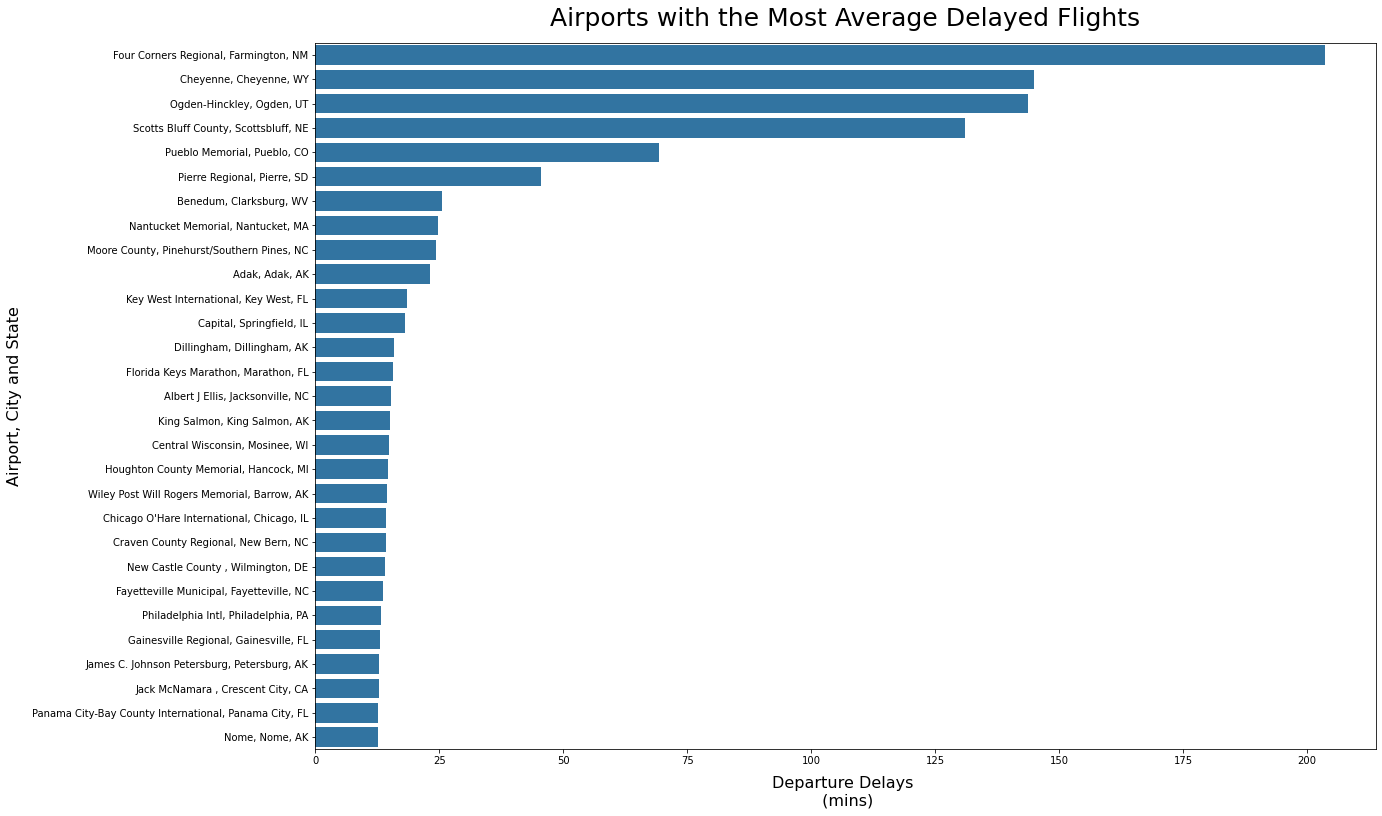

In [261]:
rcParams['figure.figsize'] = 19,13
fig, ax = plt.subplots()

sns.barplot(data=df_Origin_max, y='airport_city', x='DepDelay', color=base_color);
#sns.barplot(data=df_carrier, x='UniqueCarrier', y='ArrDelay', color='#003f5c');


plt.title('Airports with the Most Average Delayed Flights', fontsize=25, y=1.015)
plt.ylabel('Airport, City and State', labelpad=10, fontsize=16)
plt.xlabel('Departure Delays \n (mins)', labelpad=10, fontsize=16);

#ax.set_ylim([0, 15])

#DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
#ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
#plt.legend(handles=[DepDelay, ArrDelay]);

In [262]:
df_Origin_min = airport_name_df.nsmallest(30, 'DepDelay')

In [263]:
df_Origin_min.head()

,Origin,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,NASDelay,SecurityDelay,LateAircraftDelay,airport,city,state,country,lat,long,airport_city
324,GLH,1144.500000,1150.000000,1239.000000,1235.000000,5803.000000,54.500000,45.000000,35.500000,4.000000,...,0.000000,0.000000,0.000000,Mid Delta Regional,Greenville,MS,USA,33.482881,-90.985614,"Mid Delta Regional, Greenville, MS"
323,LNY,665.020761,705.695502,671.584775,730.941176,91.570934,14.543253,15.972318,-77.861592,-4.564014,...,0.000000,0.000000,0.000000,Lanai,Lanai City,HI,USA,20.785611,-156.951418,"Lanai, Lanai City, HI"
322,ITO,1335.866844,1346.052738,1420.853302,1427.250149,394.580636,49.243120,48.590286,37.745999,-2.073627,...,0.074818,0.010524,1.204718,Hilo International,Hilo,HI,USA,19.720263,-155.048470,"Hilo International, Hilo, HI"
321,MKK,708.413194,778.211806,754.472222,823.336806,90.000000,19.947917,26.930556,12.881944,-7.763889,...,0.000000,0.000000,0.777778,Molokai,Kaunakakai,HI,USA,21.152886,-157.096256,"Molokai, Kaunakakai, HI"
320,EFD,1127.460929,1169.718762,1179.604002,1215.915440,2698.180445,31.516421,28.861835,14.089468,1.564364,...,1.001510,0.001510,0.621744,Ellington,Houston,TX,USA,29.607333,-95.158750,"Ellington , Houston, TX"


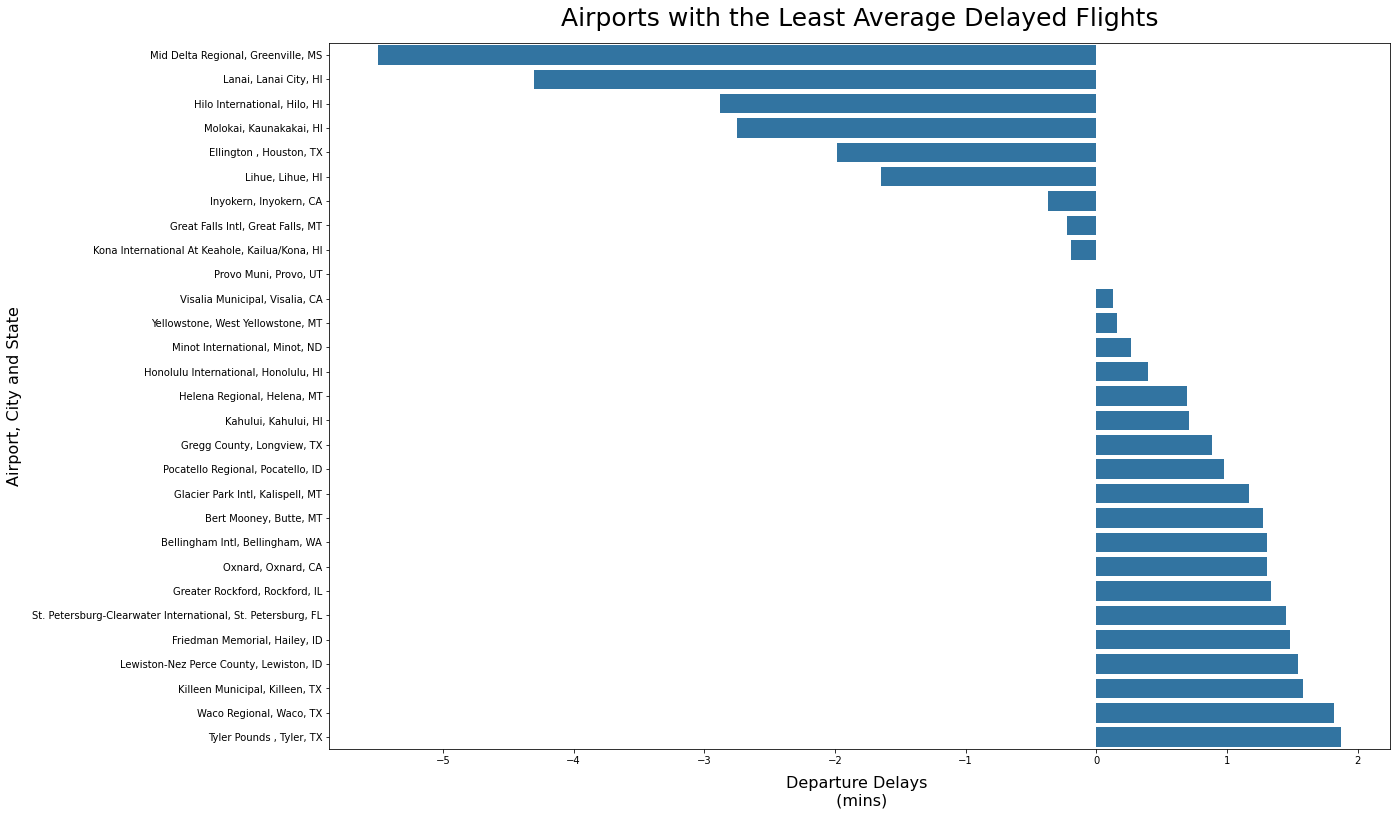

In [264]:
rcParams['figure.figsize'] = 19,13
fig, ax = plt.subplots()

sns.barplot(data=df_Origin_min, y='airport_city', x='DepDelay', color=base_color);
#sns.barplot(data=df_carrier, x='UniqueCarrier', y='ArrDelay', color='#003f5c');


plt.title('Airports with the Least Average Delayed Flights', fontsize=25, y=1.015)
plt.ylabel('Airport, City and State', labelpad=10, fontsize=16)
plt.xlabel('Departure Delays \n (mins)', labelpad=10, fontsize=16);

#ax.set_ylim([0, 15])

#DepDelay = mpatches.Patch(color='#bc5090', label='Departure Delay')
#ArrDelay = mpatches.Patch(color='#003f5c', label='Arrival Delay')
#plt.legend(handles=[DepDelay, ArrDelay]);

The chart above gives an indication of the airports with the least flight delays

In [2]:
!jupyter nbconvert Suleman_Project_3_Slides_Rev1-Copy11.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Suleman_Project_3_Slides_Rev1-Copy11.ipynb to slides
[NbConvertApp] Writing 1249217 bytes to Suleman_Project_3_Slides_Rev1-Copy11.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\aneru\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\aneru\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\aneru\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\aneru\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\aneru\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single